# The Schrödinger equation

The Schrödinger equation is a fundamental equation in quantum mechanics that describes the behavior of quantum systems. It was formulated by Erwin Schrödinger in 1925 and is given by the following equation:

Hψ = Eψ

In this equation:
- H represents the Hamiltonian operator, which corresponds to the total energy of the system.
- ψ (psi) is the wave function of the system, which describes the quantum state of a particle or a collection of particles.
- E is the energy eigenvalue associated with the wave function ψ.

The Schrödinger equation is a differential equation that determines how the wave function evolves over time. It is a foundational equation in quantum mechanics and provides a mathematical framework for understanding the behavior of quantum systems.

In its time-independent form, the Schrödinger equation can be written as:

Hψ = Eψ

Here, Hψ represents the Hamiltonian acting on the wave function ψ, resulting in the energy eigenvalue E times the wave function ψ. The time-independent Schrödinger equation is used to solve for the stationary states of a quantum system, which correspond to definite energy values.

The Schrödinger equation is a cornerstone of quantum mechanics, and its solutions provide valuable information about the probabilities of various outcomes when measurements are made on quantum systems. It is a central equation in many areas of physics, including atomic and molecular physics, solid-state physics, and quantum field theory.

In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

def solve_schrodinger_potential_well(potential, num_points, well_width):
    # Define the spatial grid
    x = np.linspace(-well_width, well_width, num_points)

    # Construct the Hamiltonian matrix
    dx = x[1] - x[0]
    diagonal = np.ones(num_points) * (2.0 / dx**2) + potential(x)
    off_diagonal = np.ones(num_points - 1) * (-1.0 / dx**2)
    hamiltonian = np.diag(diagonal) + np.diag(off_diagonal, k=1) + np.diag(off_diagonal, k=-1)

    # Solve the eigenvalue problem
    eigenvalues, eigenvectors = eigh(hamiltonian)

    return x, eigenvalues, eigenvectors

# Define the potential function
def potential(x):
    return np.where(np.abs(x) < 1, 0, np.inf)

# Solve the Schrödinger equation
num_points = 1000
well_width = 5.0
x, eigenvalues, eigenvectors = solve_schrodinger_potential_well(potential, num_points, well_width)

# Plot the eigenvalues and the corresponding wave functions
plt.figure(figsize=(10, 6))
plt.plot(x, potential(x), color='k', label='Potential')
for i in range(5):
    plt.plot(x, eigenvectors[:, i] + eigenvalues[i], label=f'Eigenvalue {i+1}')
plt.xlabel('Position')
plt.ylabel('Energy')
plt.legend()
plt.show()


ValueError: array must not contain infs or NaNs

# Lists of all the topics in the Schrödinger equation

Here is a list of key topics related to the Schrödinger equation:

1. The Schrödinger Equation: Introduction to the equation and its significance in quantum mechanics.
2. Time-Dependent Schrödinger Equation: The equation that describes the time evolution of quantum systems.
3. Time-Independent Schrödinger Equation: A specialized form of the Schrödinger equation for stationary states and energy eigenvalues.
4. Hamiltonian Operator: Definition and role of the Hamiltonian operator in the Schrödinger equation.
5. Wave Function: Introduction to the concept of the wave function as the mathematical representation of a quantum state.
6. Probability Interpretation: Understanding how the square of the wave function provides the probability distribution for a quantum system.
7. Eigenvalues and Eigenfunctions: Exploring the energy eigenvalues and eigenfunctions obtained by solving the Schrödinger equation.
8. Wave Packet: Formation and behavior of wave packets, which represent localized states in quantum mechanics.
9. Superposition Principle: The principle that states that quantum systems can exist in a linear combination of multiple states.
10. Quantum Harmonic Oscillator: Solving the Schrödinger equation for the quantum harmonic oscillator potential.
11. Potential Well: Analyzing the behavior of particles in potential wells, including finite and infinite potential wells.
12. Scattering: Using the Schrödinger equation to study the scattering of particles by a potential barrier.
13. Perturbation Theory: An approximation technique to solve the Schrödinger equation for weakly perturbed systems.
14. Time-Dependent Perturbation Theory: Extending perturbation theory to time-dependent Hamiltonians.
15. Angular Momentum: Incorporating angular momentum operators into the Schrödinger equation for systems with rotational symmetry.
16. Spin: Introducing the concept of spin and its inclusion in the Schrödinger equation.
17. Identical Particles: Handling systems with multiple identical particles using symmetric or antisymmetric wave functions.
18. Variational Method: An approximate method for finding upper and lower bounds to the ground state energy.

These topics cover various aspects of the Schrödinger equation, providing a comprehensive overview of its applications and theoretical foundations in quantum mechanics.

# The Schrödinger Equation: Introduction to the equation and its significance in quantum mechanics.

The Schrödinger Equation is a fundamental equation in quantum mechanics that describes the behavior of quantum systems. It was formulated by Austrian physicist Erwin Schrödinger in 1925. 

The equation is a partial differential equation that relates the time evolution of the wave function of a quantum system to its energy and potential. The wave function represents the state of the system and contains all the information about its observable properties.

The time-independent Schrödinger Equation is given by:

Ĥψ = Eψ

In this equation, Ĥ represents the Hamiltonian operator, which corresponds to the total energy of the system. ψ is the wave function, and E is the energy of the system. 

The time-dependent Schrödinger Equation is given by:

iħ ∂ψ/∂t = Ĥψ

Here, i represents the imaginary unit, ħ is the reduced Planck's constant, t is time, and ∂ψ/∂t denotes the time derivative of the wave function.

The solutions to the Schrödinger Equation provide the probabilities of finding a particle in a particular state or location. The square of the absolute value of the wave function, |ψ|^2, gives the probability density of finding the particle in a specific position.

The significance of the Schrödinger Equation lies in its ability to predict and explain a wide range of quantum phenomena, including the behavior of particles such as electrons, atoms, and molecules. It allows us to understand and calculate properties such as energy levels, orbital shapes, and transitions between states in quantum systems.

The Schrödinger Equation revolutionized our understanding of the microscopic world and is a cornerstone of modern physics. It forms the basis for many advanced topics in quantum mechanics, such as quantum field theory and quantum information theory, and has numerous applications in fields like chemistry, materials science, and quantum computing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Particle mass
N = 100      # Number of grid points
L = 10.0    # Length of the system
dx = L / (N-1)  # Spatial step size
dt = 0.01   # Time step size
steps = 1000  # Number of time steps

# Potential energy function (harmonic oscillator)
def potential(x):
    return 0.5 * m * x**2

# Initialize wave function
x = np.linspace(-L/2, L/2, N)
psi = np.exp(-x**2)  # Gaussian wave packet

# Solve the Schrödinger Equation
for _ in range(steps):
    # Calculate the second derivative using finite difference
    d2_psi = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    
    # Calculate the potential energy term
    V = potential(x[1:-1])
    
    # Update the wave function using the finite difference method
    psi[1:-1] += -1j * dt * (-(hbar**2/(2*m)) * d2_psi + V) * psi[1:-1]
    
# Plot the results
plt.plot(x, np.abs(psi)**2)
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Wave Function Evolution')
plt.show()


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

# Time-Dependent Schrödinger Equation: The equation that describes the time evolution of quantum systems.

The Time-Dependent Schrödinger Equation (TDSE) is a fundamental equation in quantum mechanics that describes the time evolution of quantum systems. It is an extension of the time-independent Schrödinger Equation and allows us to understand how the wave function of a quantum system changes over time. 

The TDSE is given by:

iħ ∂ψ/∂t = Ĥψ

In this equation, i represents the imaginary unit, ħ is the reduced Planck's constant, t is time, ∂ψ/∂t denotes the partial derivative of the wave function ψ with respect to time, and Ĥ is the Hamiltonian operator.

The Hamiltonian operator, Ĥ, represents the total energy of the system and is defined as the sum of the kinetic energy operator (Ĥ_kin) and the potential energy operator (Ĥ_pot):

Ĥ = Ĥ_kin + Ĥ_pot

The kinetic energy operator is given by:

Ĥ_kin = - (ħ^2 / (2m)) ∇^2

Here, m is the mass of the particle, ħ is the reduced Planck's constant, and ∇^2 is the Laplacian operator, which represents the spatial second derivative.

The potential energy operator, Ĥ_pot, represents the potential energy of the system and depends on the specific physical scenario under consideration. For example, in the case of a particle in a one-dimensional potential well, Ĥ_pot would be a function of position (x).

Solving the TDSE involves finding the time-dependent wave function ψ(t), which describes the state of the quantum system at any given time. Once the wave function is known, we can obtain various observable quantities by calculating expectation values. For instance, the probability density of finding the particle at a certain position is given by |ψ(t)|^2.

The TDSE is a powerful equation that allows us to study and predict the behavior of quantum systems as they evolve in time. It provides insights into phenomena such as energy transitions, interference, and wave packet spreading. The TDSE forms the basis for understanding and analyzing a wide range of quantum phenomena and is essential in fields like quantum mechanics, quantum chemistry, and quantum optics.

# Time-Independent Schrödinger Equation: A specialized form of the Schrödinger equation for stationary states and energy eigenvalues.

The Time-Independent Schrödinger Equation (TISE) is a specialized form of the Schrödinger equation that describes stationary states and energy eigenvalues in quantum mechanics. It is given by:

HΨ = EΨ

where H is the Hamiltonian operator representing the total energy of the system, Ψ is the wave function of the particle, E is the energy of the system, and ℏ is the reduced Planck's constant.

In one dimension, the TISE takes the form:

(-ħ²/2m) d²Ψ/dx² + V(x)Ψ = EΨ

where m is the mass of the particle, V(x) is the potential energy function, and d²Ψ/dx² represents the second derivative of the wave function with respect to position.

In three dimensions, the TISE becomes:

(-ħ²/2m) (∇²Ψ) + V(x, y, z)Ψ = EΨ

where ∇²Ψ represents the Laplacian operator acting on the wave function, and V(x, y, z) is the three-dimensional potential energy function.

Solving the TISE involves finding the wave function Ψ and its corresponding energy eigenvalues E for a given potential energy function V(x) or V(x, y, z). The solutions to the TISE provide the stationary states of the system, which have definite energies and do not change with time. The probability density of finding the particle in a particular state is given by |Ψ|².

Various techniques, such as separation of variables, approximation methods, and numerical methods, are employed to solve the TISE for different potential energy functions and boundary conditions. The solutions provide insights into the behavior and properties of quantum systems.

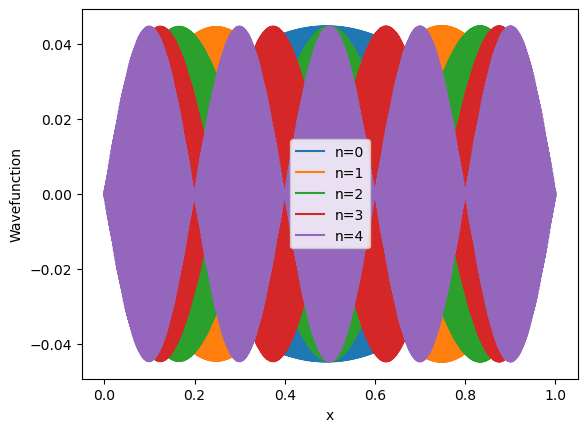

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Particle mass
L = 1.0     # Length of the domain
N = 1000    # Number of grid points
dx = L / (N - 1)  # Grid spacing

# Potential energy function
def potential(x):
    return 0.5 * x**2  # Harmonic oscillator potential

# Construct the Hamiltonian matrix
def construct_hamiltonian():
    # Diagonal elements
    diagonal = np.ones(N) * (-hbar**2 / (2 * m * dx**2))
    # Off-diagonal elements
    off_diagonal = np.ones(N-1) * (hbar**2 / (4 * m * dx**2))
    
    # Construct the tridiagonal Hamiltonian matrix
    H = np.diag(diagonal) + np.diag(off_diagonal, k=1) + np.diag(off_diagonal, k=-1)
    
    # Add potential energy terms
    x = np.linspace(0, L, N)
    V = np.diag(potential(x))
    H += V
    
    return H

# Solve the eigenvalue problem
H = construct_hamiltonian()
energies, wavefunctions = np.linalg.eigh(H)

# Plot the results
x = np.linspace(0, L, N)
for i in range(5):  # Plotting the first 5 eigenstates
    plt.plot(x, wavefunctions[:, i], label=f"n={i}")
plt.xlabel("x")
plt.ylabel("Wavefunction")
plt.legend()
plt.show()


# Hamiltonian Operator: Definition and role of the Hamiltonian operator in the Schrödinger equation.

The Hamiltonian operator, denoted as H, is a fundamental concept in quantum mechanics. It represents the total energy of a quantum system and plays a central role in the Time-Dependent Schrödinger Equation (TDSE) and the Time-Independent Schrödinger Equation (TISE).

In the TDSE, the Hamiltonian operator is given by:

H = T + V

where T is the kinetic energy operator and V is the potential energy operator. The kinetic energy operator depends on the momentum operator p, and it is defined as:

T = (p² / (2m))

where p² represents the squared momentum operator and m is the mass of the particle.

The potential energy operator V depends on the position operator x and is defined as:

V = V(x)

where V(x) represents the potential energy as a function of position.

The TDSE with the Hamiltonian operator is given by:

HΨ(x, t) = iħ ∂Ψ(x, t) / ∂t

where Ψ(x, t) is the wave function of the system, and ∂Ψ(x, t) / ∂t represents the partial derivative of the wave function with respect to time. This equation describes the time evolution of the wave function and relates the energy of the system (given by the Hamiltonian operator) to the time derivative of the wave function.

In the TISE, which describes stationary states and energy eigenvalues, the Hamiltonian operator is given by:

HΨ(x) = EΨ(x)

where Ψ(x) is the stationary wave function, E is the energy eigenvalue of the system, and the wave function does not explicitly depend on time.

Solving the TISE involves finding the eigenvalues E and the corresponding eigenfunctions Ψ(x) of the Hamiltonian operator. The eigenvalues represent the allowed energy states of the system, and the eigenfunctions describe the probability amplitudes associated with each energy state.

The Hamiltonian operator is a key concept in quantum mechanics as it captures the energy dynamics of a system and allows us to understand and predict the behavior of quantum particles.

In [2]:
import numpy as np
from scipy.sparse import diags

# Constants
hbar = 1.0  # Reduced Planck's constant
m = 1.0     # Particle mass

# Grid parameters
N = 100    # Number of grid points
L = 1.0    # Length of the domain
dx = L / (N - 1)  # Grid spacing

# Potential energy function
def potential(x):
    return 0.5 * x**2  # Harmonic oscillator potential

# Kinetic energy operator
def kinetic_operator():
    diagonal = np.ones(N) * (-hbar**2 / (2 * m * dx**2))
    off_diagonal = np.ones(N-1) * (hbar**2 / (4 * m * dx**2))
    return diags([off_diagonal, diagonal, off_diagonal], [-1, 0, 1], shape=(N, N))

# Potential energy operator
def potential_operator():
    x = np.linspace(0, L, N)
    V = potential(x)
    return diags(V)

# Hamiltonian operator
def hamiltonian_operator():
    return kinetic_operator() + potential_operator()

# Print the Hamiltonian matrix
H = hamiltonian_operator().toarray()
print(H)


[[-4900.5         2450.25           0.         ...     0.
      0.             0.        ]
 [ 2450.25       -4900.49994898  2450.25       ...     0.
      0.             0.        ]
 [    0.          2450.25       -4900.49979594 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... -4900.01999796
   2450.25           0.        ]
 [    0.             0.             0.         ...  2450.25
  -4900.01004999  2450.25      ]
 [    0.             0.             0.         ...     0.
   2450.25       -4900.        ]]


# Wave Function: Introduction to the concept of the wave function as the mathematical representation of a quantum state.

The wave function is a fundamental concept in quantum mechanics that represents the state of a quantum system. It is a mathematical function that describes the probability distribution of finding a particle in a particular state.

The wave function is denoted by the Greek letter Ψ (psi) and depends on the coordinates of the system, such as position or momentum. In one dimension, the wave function Ψ(x, t) describes the probability amplitude of finding a particle at position x and time t.

The time-independent Schrödinger equation is a key equation in quantum mechanics that governs the behavior of the wave function. It is given by:

ĤΨ(x) = EΨ(x),

where Ĥ is the Hamiltonian operator, Ψ(x) is the wave function, E is the energy of the system, and x represents position.

The square of the wave function, |Ψ(x)|^2, gives the probability density of finding the particle at a particular position. The integral of |Ψ(x)|^2 over a specific region gives the probability of finding the particle within that region.

The normalization condition ensures that the total probability of finding the particle in all possible positions is equal to 1. Mathematically, it is expressed as:

∫|Ψ(x)|^2 dx = 1,

where the integral is taken over all possible positions.

The wave function can also be expanded as a linear combination of basis functions, such as eigenfunctions of the Hamiltonian. This expansion allows for the representation of more complex quantum systems.

It's important to note that the wave function is generally a complex-valued function, meaning it contains both real and imaginary parts. The complex nature of the wave function reflects the interference and superposition effects observed in quantum mechanics.

Overall, the wave function serves as a powerful mathematical tool for describing and predicting the behavior of quantum systems, providing insights into the probabilities of various outcomes.

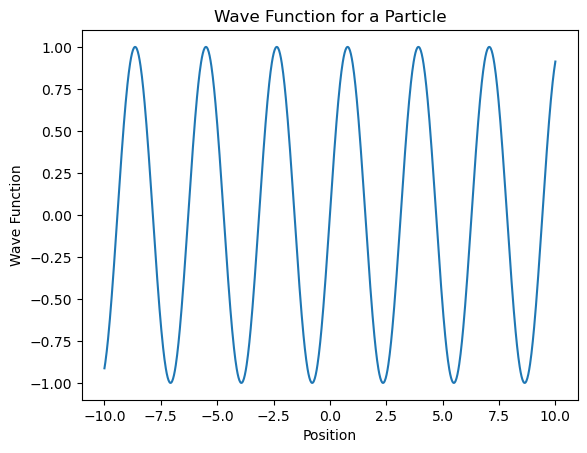

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
x = np.linspace(-10, 10, 1000)  # Spatial coordinates
k = 2.0  # Wavenumber
A = 1.0  # Amplitude

# Compute the wave function
psi = A * np.sin(k * x)

# Plot the wave function
plt.plot(x, psi)
plt.xlabel('Position')
plt.ylabel('Wave Function')
plt.title('Wave Function for a Particle')
plt.show()


# Probability Interpretation: Understanding how the square of the wave function provides the probability distribution for a quantum system.

The probability interpretation in quantum mechanics relates to the square of the wave function, which gives the probability distribution for a quantum system. Here's an explanation of the concept along with the relevant equations:

The wave function Ψ(x, t) describes the state of a quantum system, where x represents position and t represents time. The probability of finding the particle in a particular position x is given by the square of the wave function, |Ψ(x, t)|^2.

Mathematically, the probability density is defined as:

ρ(x, t) = |Ψ(x, t)|^2.

The probability density ρ(x, t) represents the probability per unit volume of finding the particle at position x and time t. It indicates the likelihood of finding the particle in a specific region of space.

To determine the probability of finding the particle within a specific interval [a, b], we integrate the probability density over that interval:

P(a ≤ x ≤ b) = ∫[a, b] ρ(x, t) dx.

The integral gives the total probability of finding the particle within the interval [a, b].

The normalization condition ensures that the total probability of finding the particle over all possible positions is equal to 1. Mathematically, it is expressed as:

∫ ρ(x, t) dx = 1,

where the integral is taken over all possible positions.

It's important to note that the probability density is always a non-negative real value. Consequently, the square of the wave function |Ψ(x, t)|^2 must be non-negative to satisfy this requirement.

The interpretation of the wave function as a probability distribution is a fundamental aspect of quantum mechanics. It provides a way to calculate the likelihood of various outcomes for a quantum system and allows predictions to be made about the behavior of particles.

Overall, the probability interpretation in quantum mechanics emphasizes that the square of the wave function represents the probability distribution, enabling us to understand the likelihood of finding a particle in different states or positions.

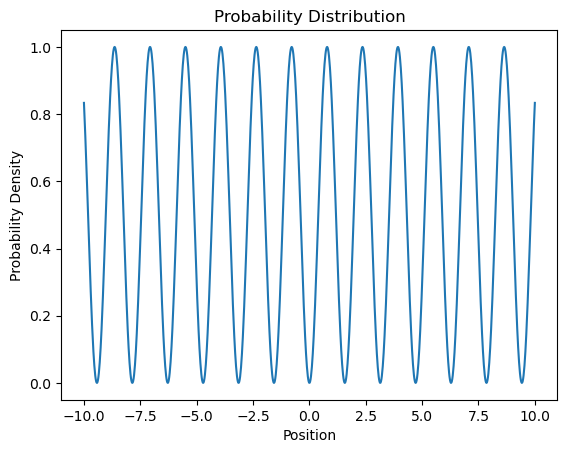

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
x = np.linspace(-10, 10, 1000)  # Spatial coordinates
k = 2.0  # Wavenumber
A = 1.0  # Amplitude

# Compute the wave function
psi = A * np.sin(k * x)

# Compute the probability density
rho = np.abs(psi)**2

# Plot the probability density
plt.plot(x, rho)
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Probability Distribution')
plt.show()


# Eigenvalues and Eigenfunctions: Exploring the energy eigenvalues and eigenfunctions obtained by solving the Schrödinger equation.

Eigenvalues and eigenfunctions play a crucial role in quantum mechanics, particularly in solving the Schrödinger equation. Here's a concise explanation of the concepts and equations related to eigenvalues and eigenfunctions:

1. Schrödinger Equation:
The time-independent Schrödinger equation describes the behavior of quantum systems:
Ĥψ = Eψ
Where Ĥ is the Hamiltonian operator, ψ represents the wave function, E represents the energy of the system, and ħ is the reduced Planck's constant.

2. Eigenvalues:
Eigenvalues (E) are the allowed energy values that a quantum system can possess. Solving the Schrödinger equation yields a set of eigenvalues, which represent the possible energy states of the system.

3. Eigenfunctions:
Eigenfunctions (ψ) are the corresponding wave functions associated with the eigenvalues. They describe the spatial distribution of the particle in the system. Each eigenfunction represents a specific energy state of the system.

4. Orthogonality:
Eigenfunctions corresponding to different eigenvalues are orthogonal, meaning their inner product is zero. This property ensures that energy states are distinct and non-degenerate.

5. Normalization:
Eigenfunctions are normalized such that the integral of the absolute square of the wave function over all space equals unity:
∫ |ψ(x)|^2 dx = 1

6. Time Evolution:
Eigenfunctions are stationary states since they do not change with time. The time evolution of a general wave function can be expressed as a linear combination of the eigenfunctions:
ψ(x, t) = Σ C_nψ_n(x)exp(-iE_nt/ħ)
Where C_n represents the coefficients, ψ_n(x) are the eigenfunctions, E_n are the eigenvalues, and t represents time.

7. Superposition Principle:
The superposition principle states that any wave function can be expressed as a linear combination of eigenfunctions, allowing the system to exist in multiple energy states simultaneously.

Understanding eigenvalues and eigenfunctions is fundamental for solving the Schrödinger equation and analyzing the energy states of quantum systems. They provide insights into the quantized nature of energy and the behavior of particles at the quantum level.

Eigenvalues:
n = 0: 0.4999968687936585
n = 1: 1.4999843468721215
n = 2: 2.4999593698097446
n = 3: 3.499922839108584
n = 4: 4.499883281342448
n = 5: 5.4999005855390255
n = 6: 6.5002958566353035
n = 7: 7.502394864846743
n = 8: 8.510387063258056
n = 9: 9.534241231386282
n = 10: 10.591497233853604
n = 11: 11.704726844424485
n = 12: 12.895203945930875
n = 13: 14.177801052112459
n = 14: 15.56032886613143
n = 15: 17.045757841491074
n = 16: 18.634610919001894
n = 17: 20.326445794122105
n = 18: 22.120552564882047
n = 19: 24.016225667593375
n = 20: 26.012848952244866
n = 21: 28.109909060360266
n = 22: 30.30698502782687
n = 23: 32.60373231198375
n = 24: 34.99986750208905
n = 25: 37.49515545461486
n = 26: 40.08939899777945
n = 27: 42.78243085974799
n = 28: 45.574107385074406
n = 29: 48.464303645230196
n = 30: 51.45290962218554
n = 31: 54.53982721491251
n = 32: 57.72496787762503
n = 33: 61.008250744779424
n = 34: 64.38960113303162
n = 35: 67.868949336799
n = 36: 71.44622965391989
n = 37: 75.1213795

C:\Users\yashr\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


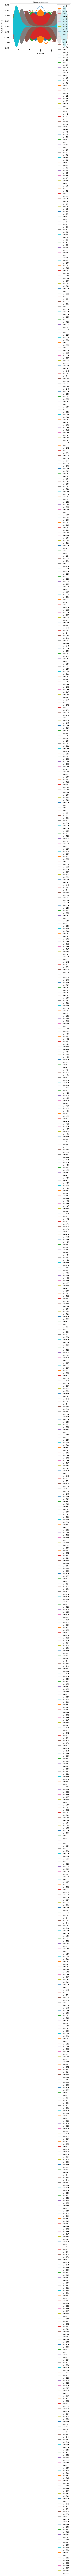

In [1]:
import numpy as np
from scipy.linalg import eigh

# Define the potential function V(x)
def potential(x):
    return 0.5 * x**2  # Harmonic oscillator potential

# Define the Hamiltonian matrix
def hamiltonian_matrix(x, potential):
    n = len(x)
    h = x[1] - x[0]
    H = np.zeros((n, n))
    
    for i in range(n):
        H[i, i] = 1.0 / h**2 + potential(x[i])
        if i > 0:
            H[i, i - 1] = -0.5 / h**2
        if i < n - 1:
            H[i, i + 1] = -0.5 / h**2
    
    return H

# Define the function to solve the Schrödinger equation
def solve_schrodinger_eq(x, potential):
    H = hamiltonian_matrix(x, potential)
    eigenvalues, eigenvectors = eigh(H)
    return eigenvalues, eigenvectors

# Define the parameters
x_min = -5.0  # Minimum position
x_max = 5.0   # Maximum position
n_points = 1000  # Number of points on the grid

# Create the grid
x = np.linspace(x_min, x_max, n_points)

# Solve the Schrödinger equation
eigenvalues, eigenvectors = solve_schrodinger_eq(x, potential)

# Print the eigenvalues
print("Eigenvalues:")
for i in range(len(eigenvalues)):
    print(f"n = {i}: {eigenvalues[i]}")

# Plot the eigenfunctions
import matplotlib.pyplot as plt

plt.figure()
plt.title("Eigenfunctions")
for i in range(len(eigenvalues)):
    eigenfunction = eigenvectors[:, i]
    plt.plot(x, eigenfunction, label=f"n = {i}")
plt.xlabel("Position")
plt.ylabel("Wave Function")
plt.legend()
plt.show()


# Wave Packet: Formation and behavior of wave packets, which represent localized states in quantum mechanics.

Wave packets are a fundamental concept in quantum mechanics that describe the behavior of particles as localized states. They represent a superposition of different wave functions, allowing particles to exhibit both particle-like and wave-like properties. Here's a concise explanation of wave packets and their behavior, along with relevant equations:

1. Wave Packet Formation:
A wave packet is formed by combining multiple plane waves with different wavelengths and amplitudes. This superposition creates a localized and well-defined wave function that represents the particle's position and momentum distribution.

2. Gaussian Wave Packet:
A commonly used form of a wave packet is the Gaussian wave packet. It has the following form:
ψ(x, t) = A exp(-(x - x₀)^2 / (4σ^2)) exp(i(k₀x - ω₀t))
Where A is the normalization constant, x₀ represents the central position of the wave packet, σ is the width parameter determining its spatial extent, k₀ is the central wave number, and ω₀ is the central angular frequency.

3. Dispersion Relation:
The dispersion relation describes the relationship between the wave number (k) and the angular frequency (ω) of a wave. In quantum mechanics, it is given by the de Broglie relation:
k = p / ħ
ω = E / ħ
Where p is the momentum of the particle, E is its energy, and ħ is the reduced Planck's constant.

4. Uncertainty Principle:
Wave packets exhibit a trade-off between spatial localization and momentum spread, described by the Heisenberg uncertainty principle. It states that the product of the uncertainties in position (Δx) and momentum (Δp) cannot be smaller than a certain value:
Δx Δp ≥ ħ/2

5. Time Evolution:
Wave packets evolve in time according to the Schrödinger equation. The time evolution of a wave packet can be obtained by applying the time-dependent phase factor:
ψ(x, t) = ψ(x, 0) exp(-iEt/ħ)
Where ψ(x, 0) is the initial wave function, E is the energy of the system, and t represents time.

6. Spreading of Wave Packet:
Due to the dispersive nature of quantum systems, wave packets tend to spread out over time. This spreading is quantitatively described by the spreading of the wave packet's width σ(t), given by:
σ(t) = σ₀ √(1 + (σ₀²Δk²)/(4))
Where σ₀ is the initial width of the wave packet and Δk is the spread in wave numbers.

Wave packets provide a way to describe the localized behavior of particles in quantum mechanics, accounting for their position and momentum distributions. They illustrate the wave-particle duality and the probabilistic nature of quantum systems.

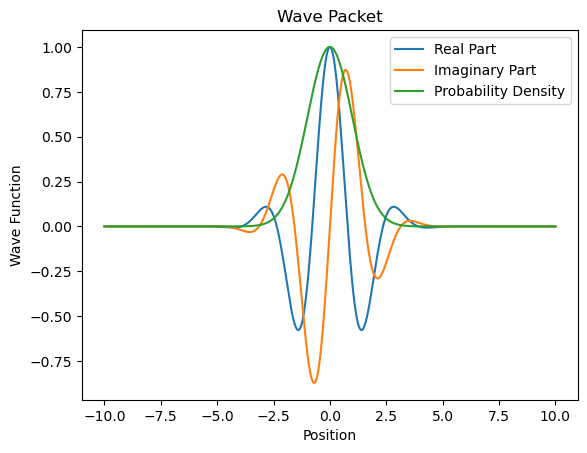

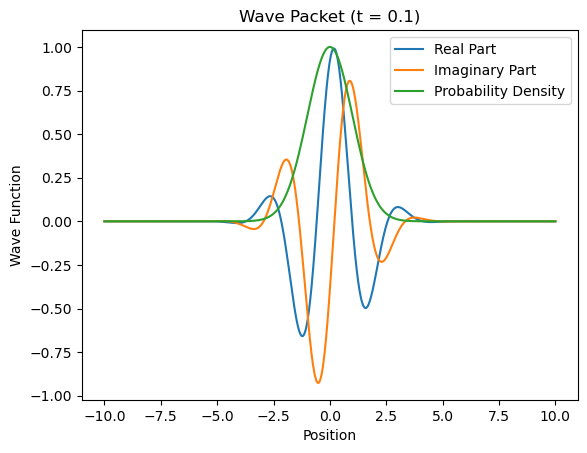

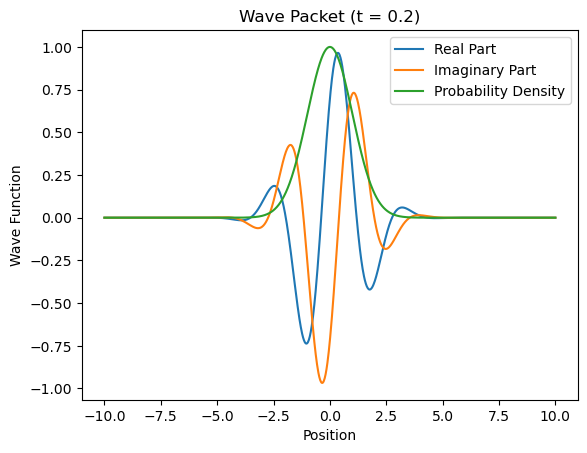

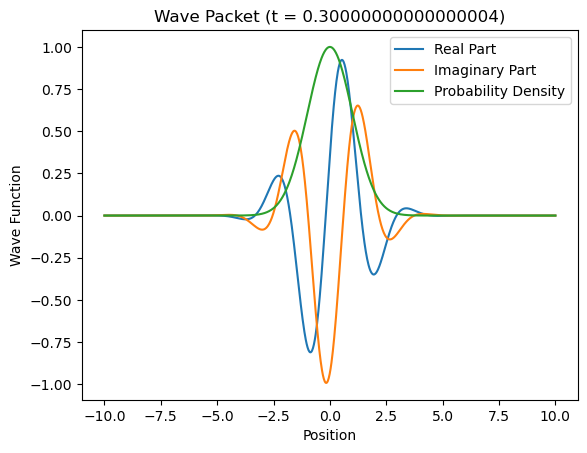

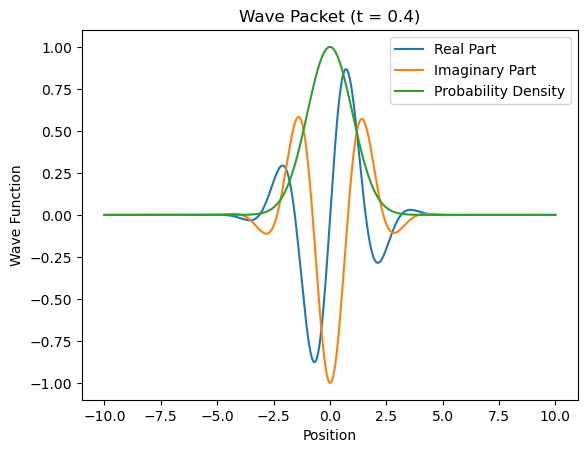

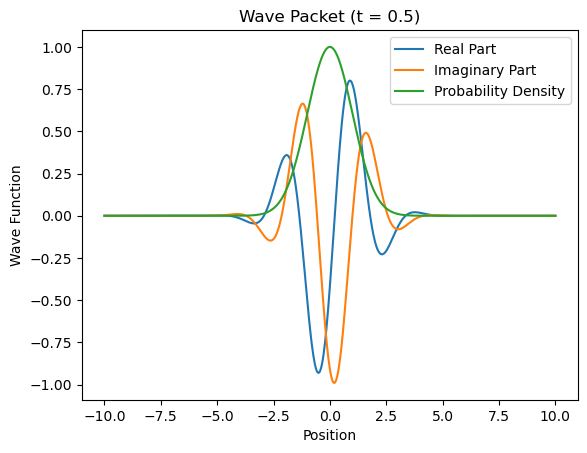

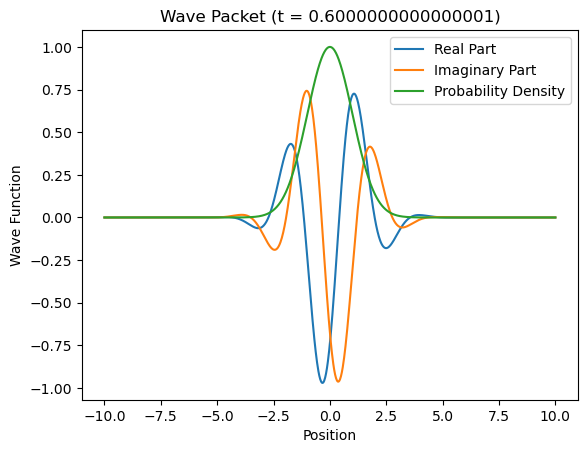

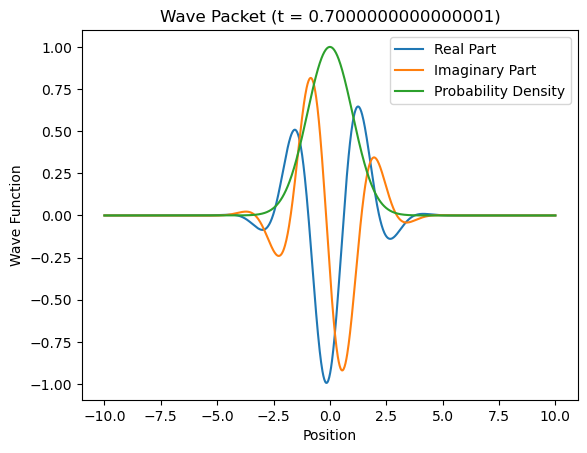

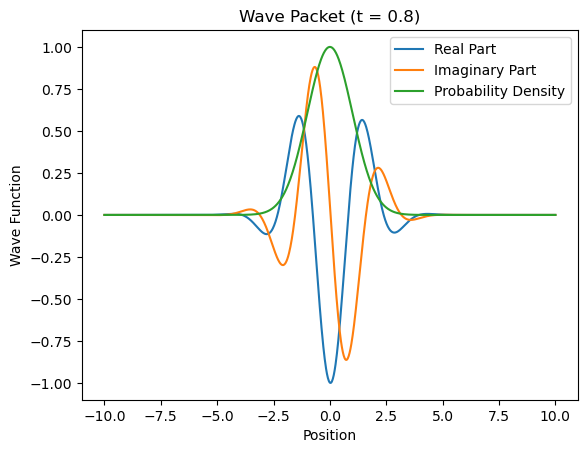

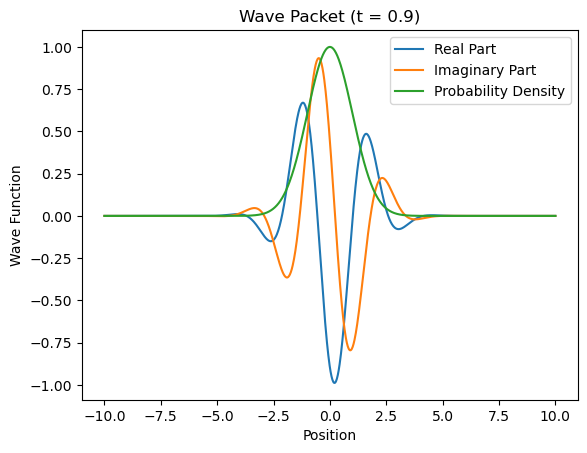

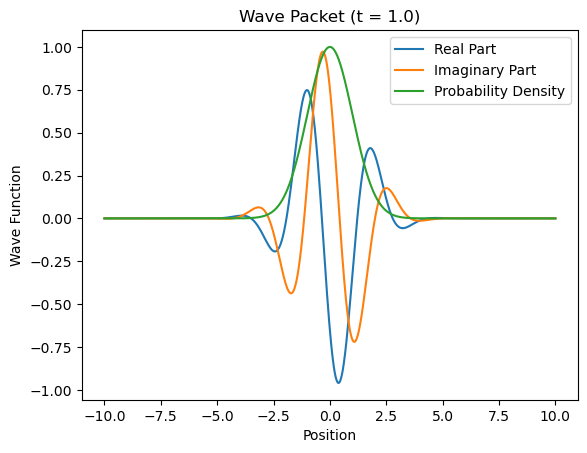

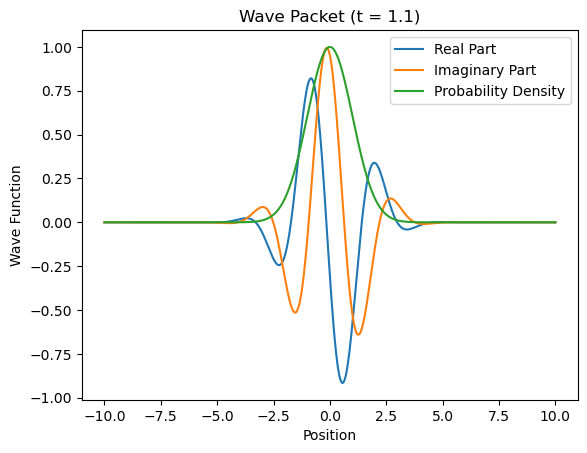

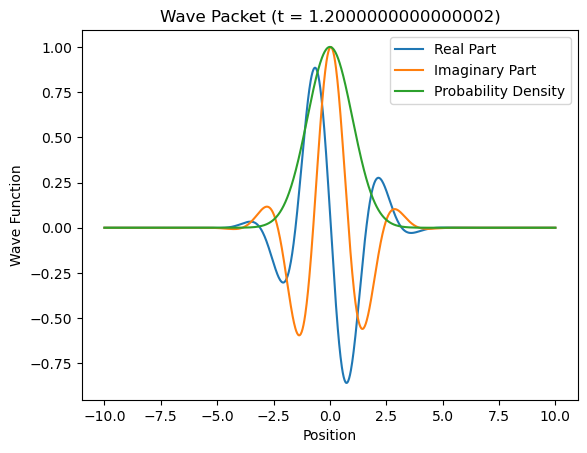

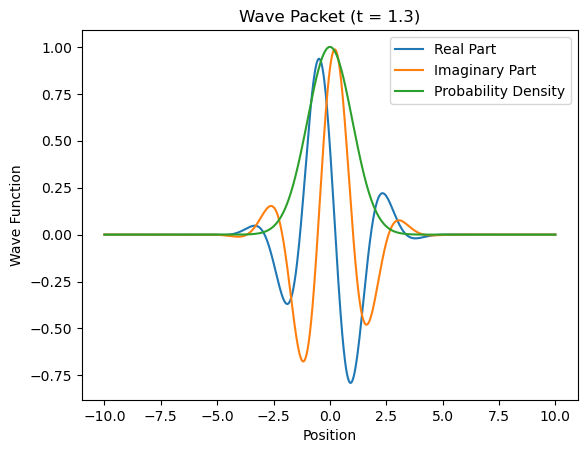

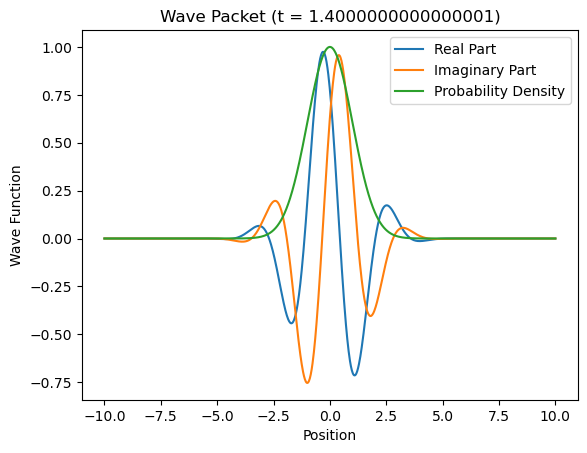

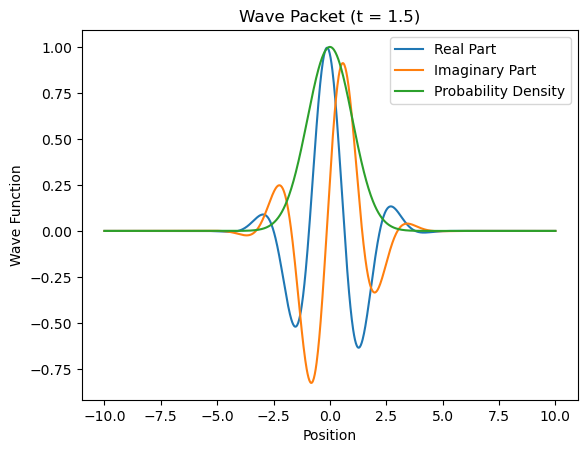

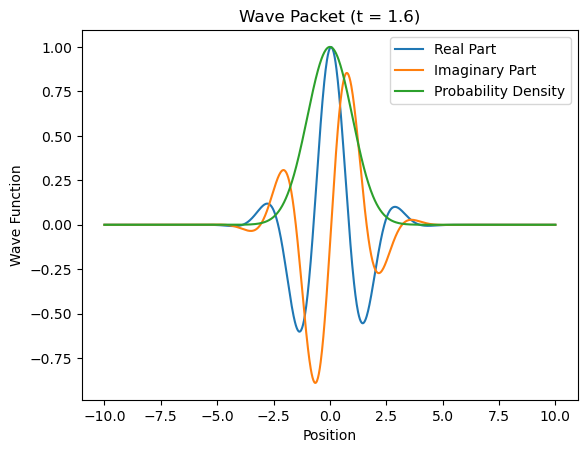

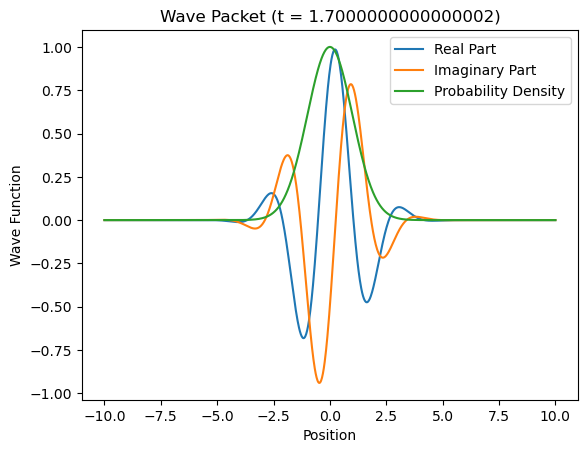

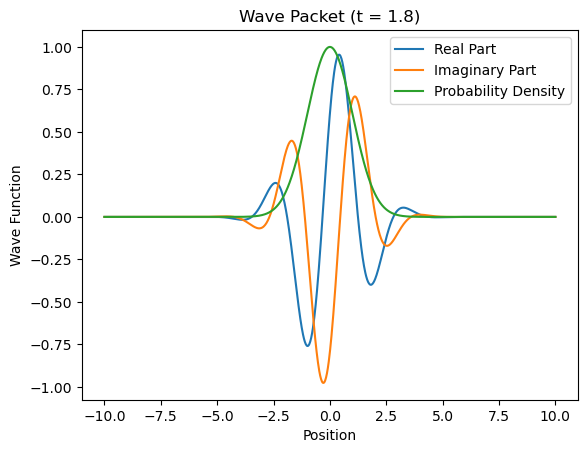

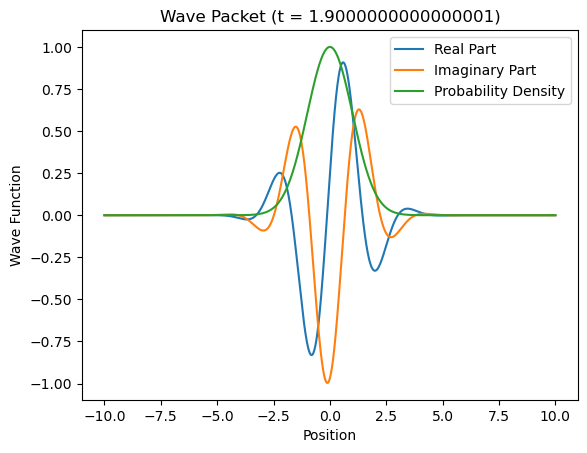

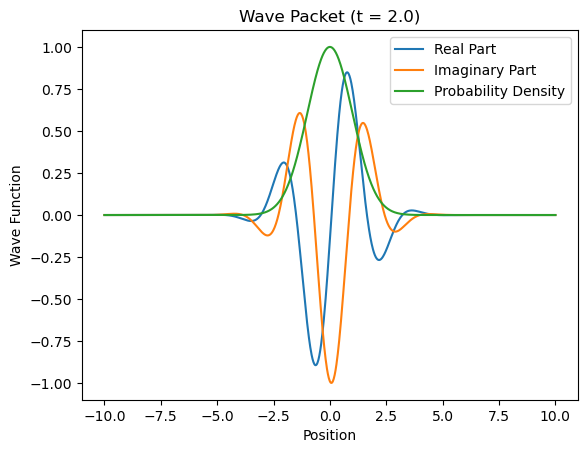

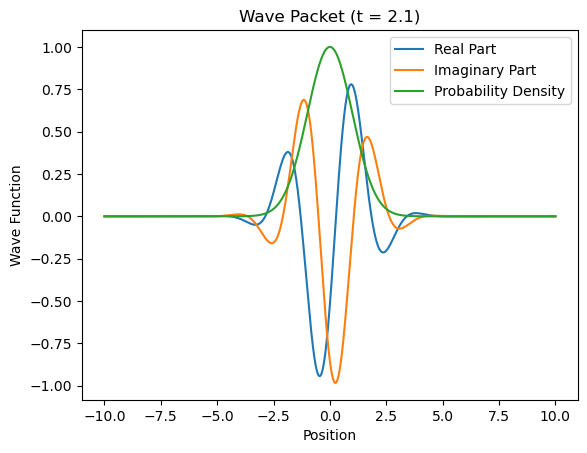

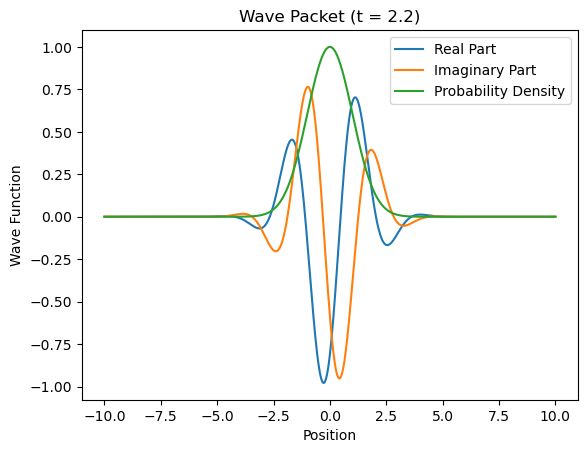

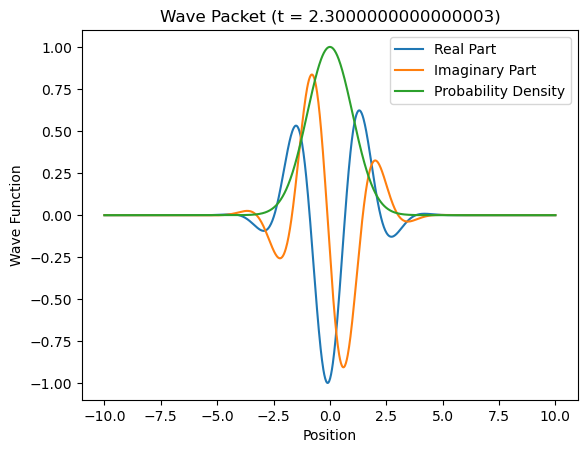

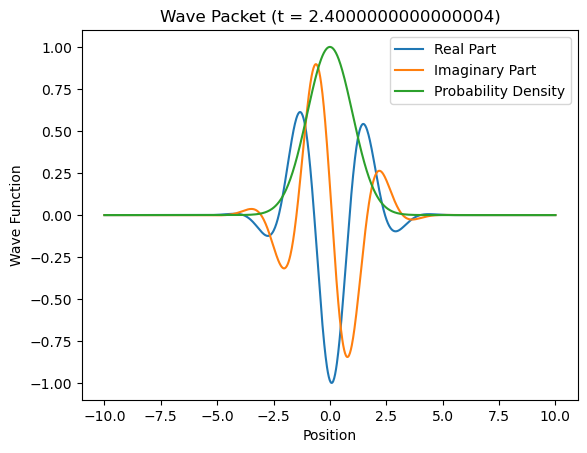

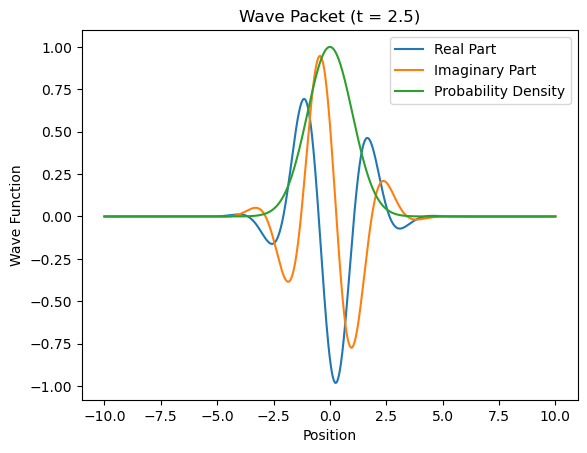

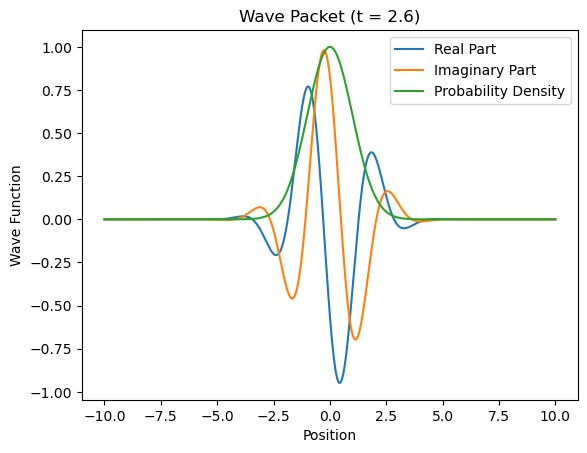

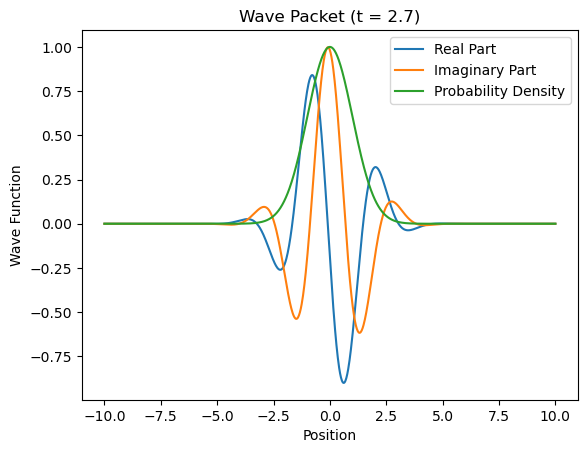

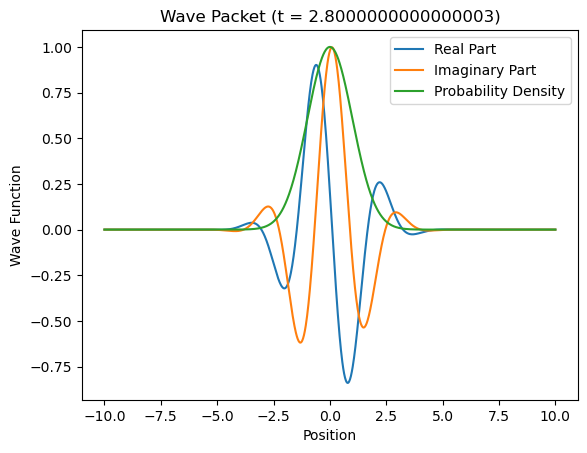

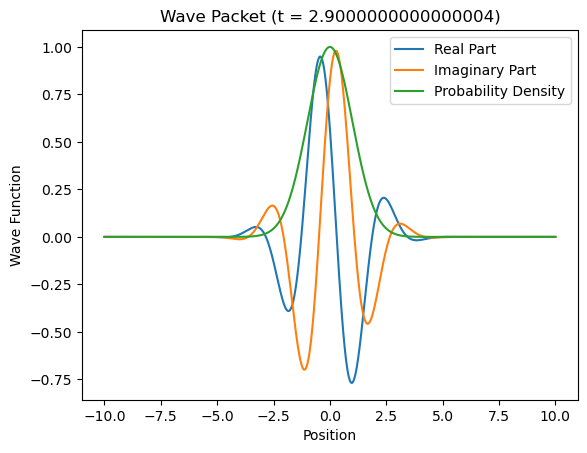

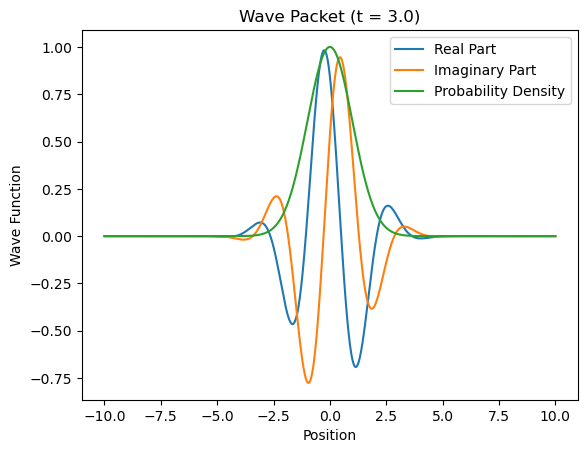

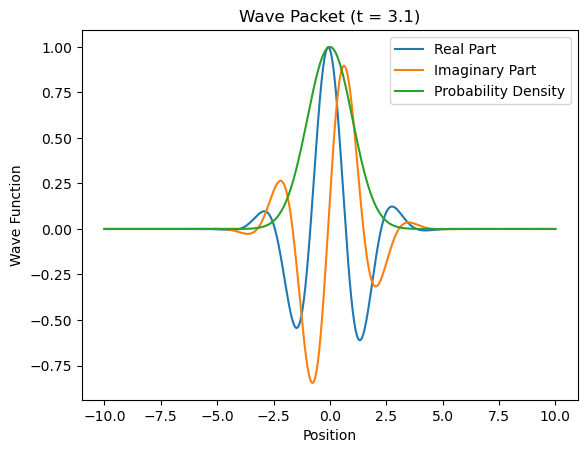

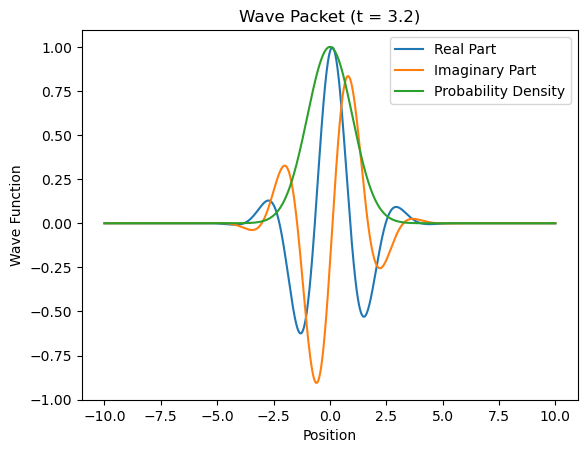

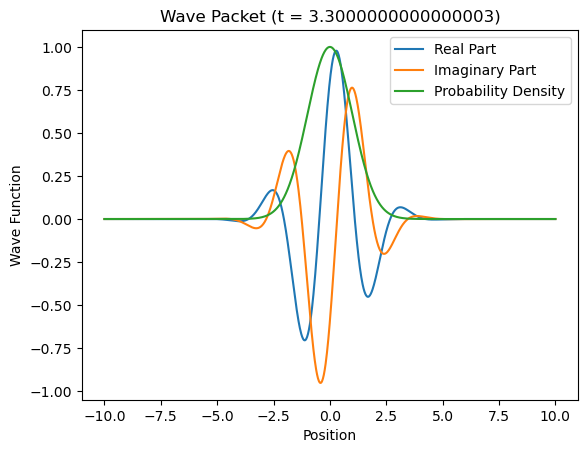

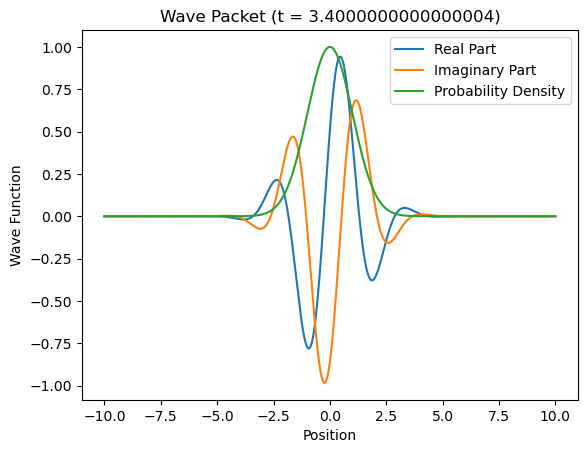

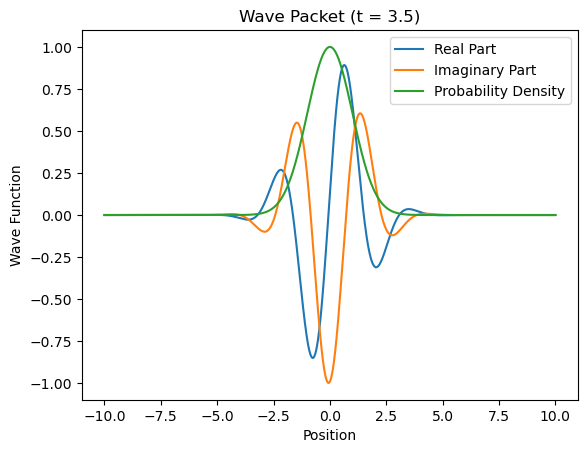

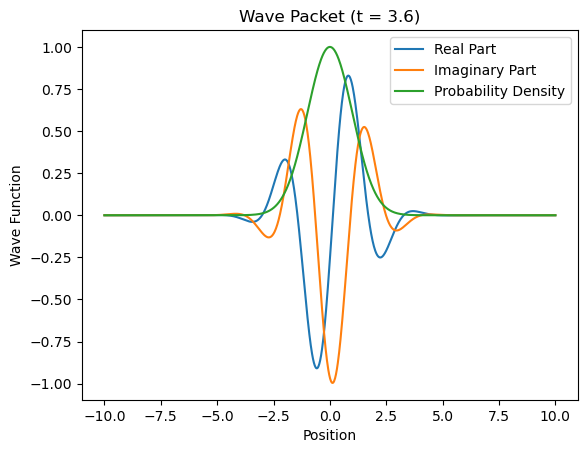

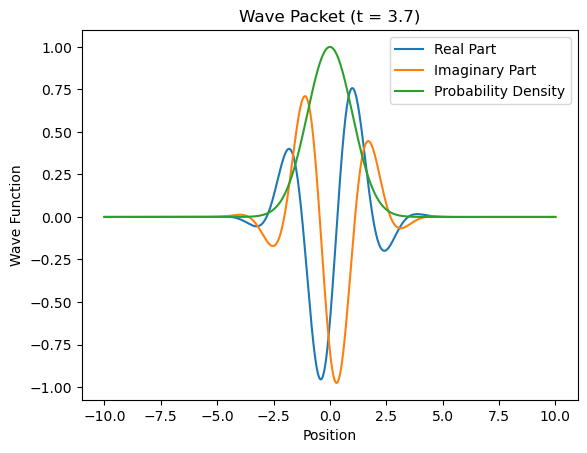

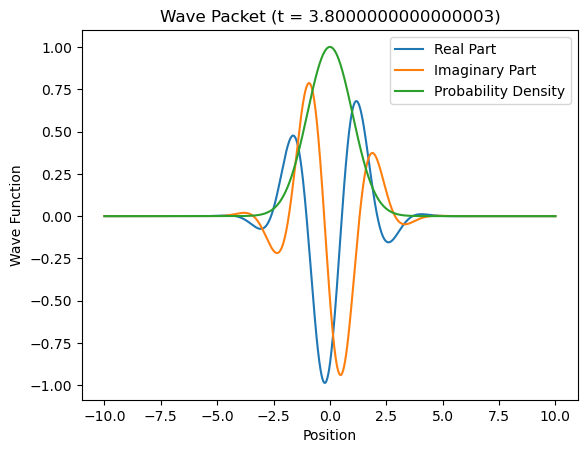

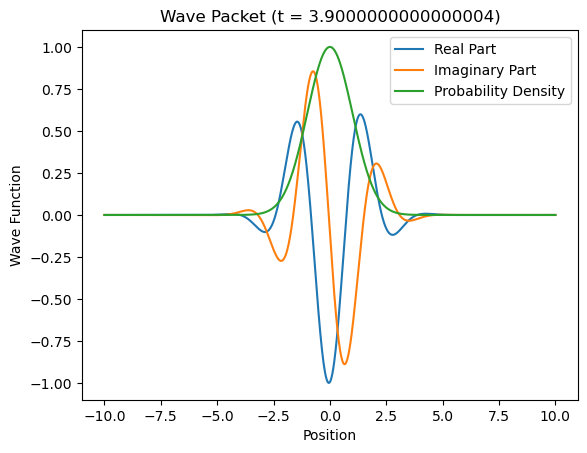

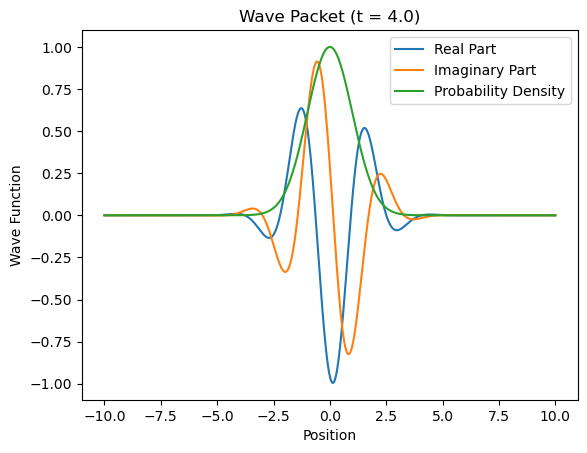

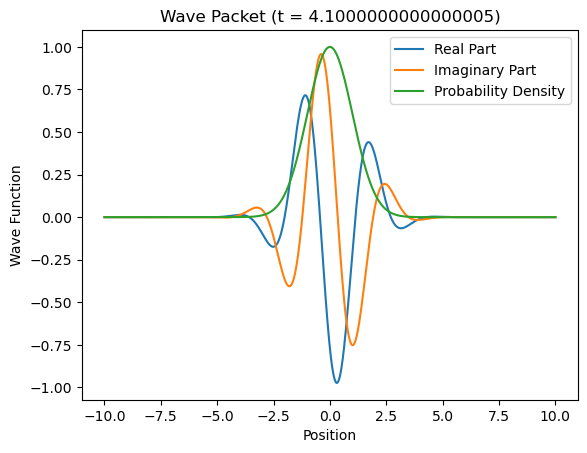

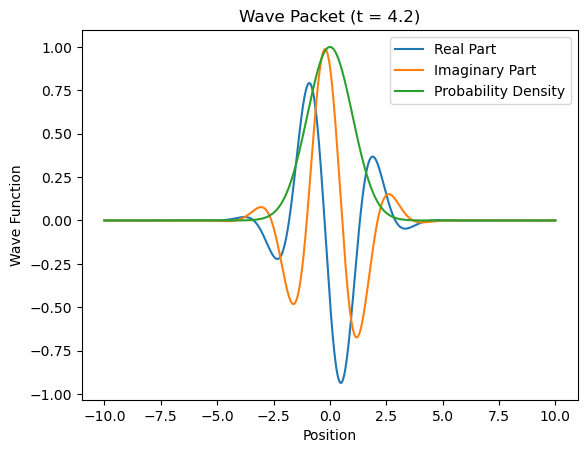

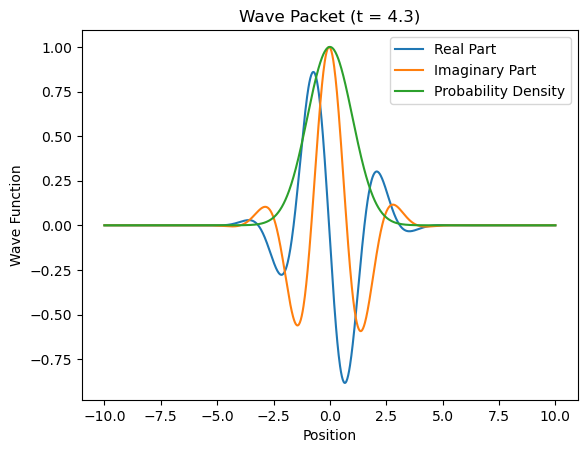

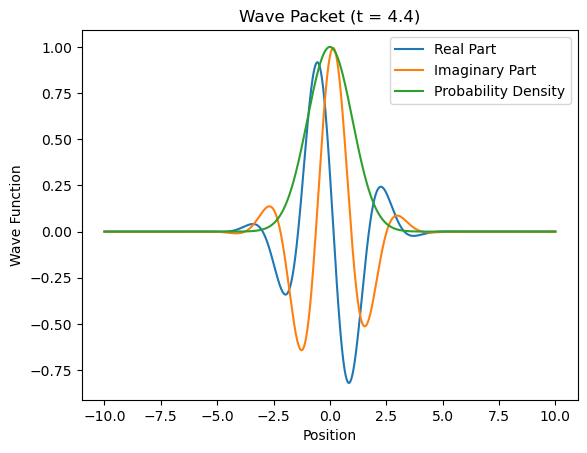

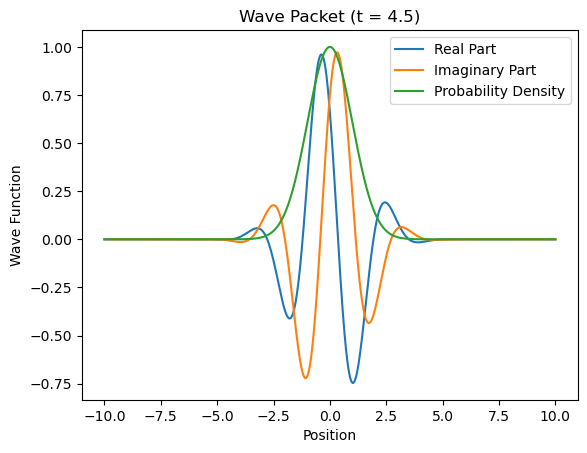

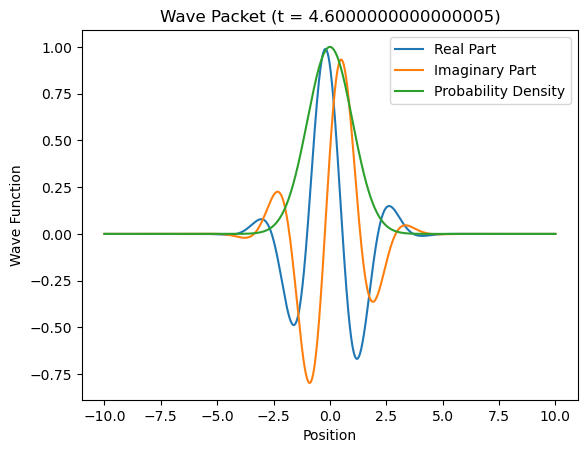

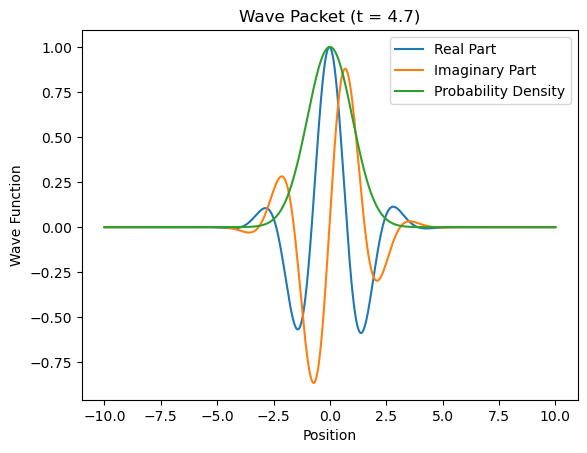

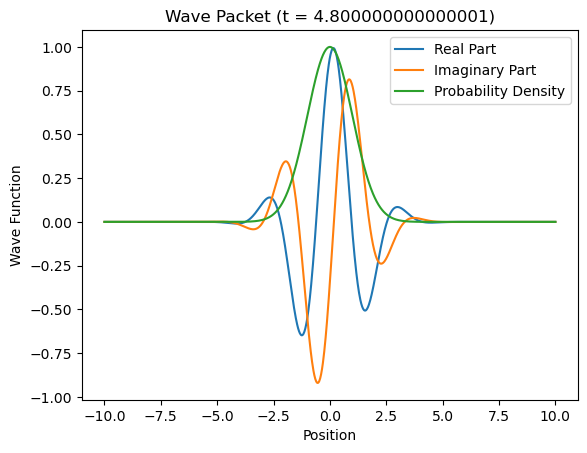

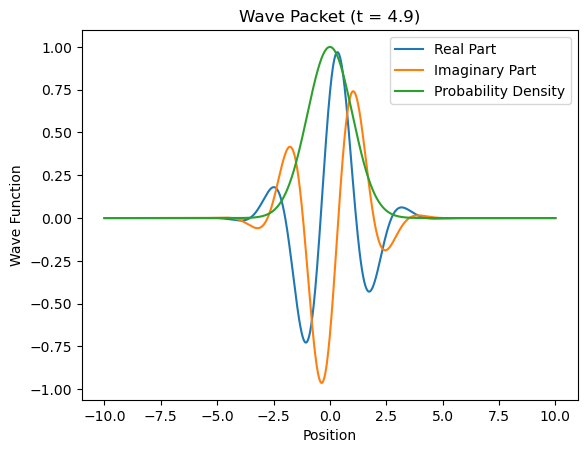

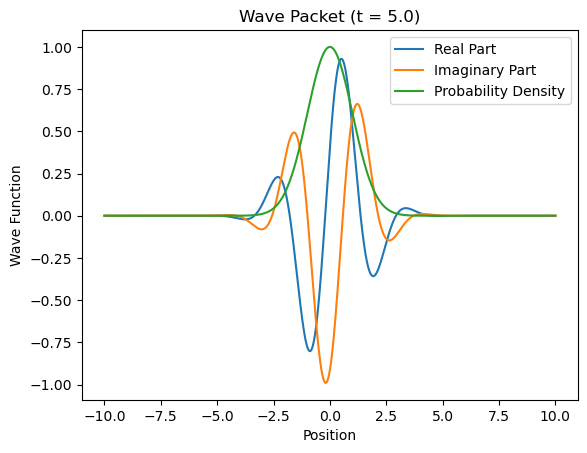

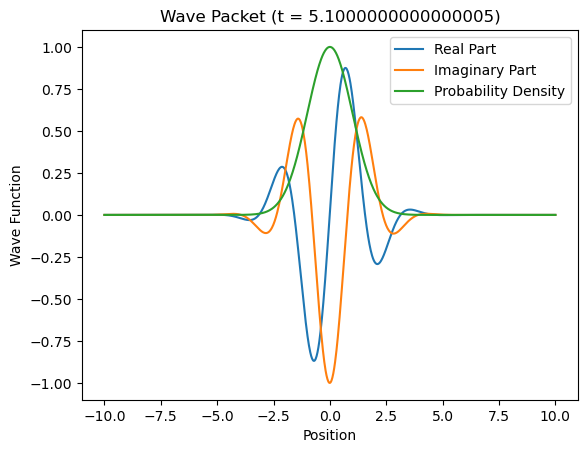

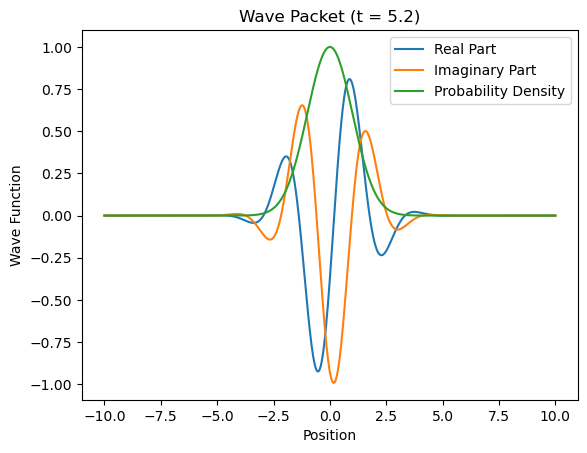

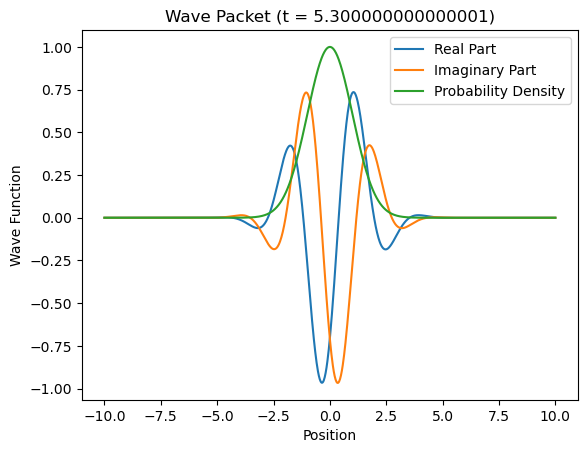

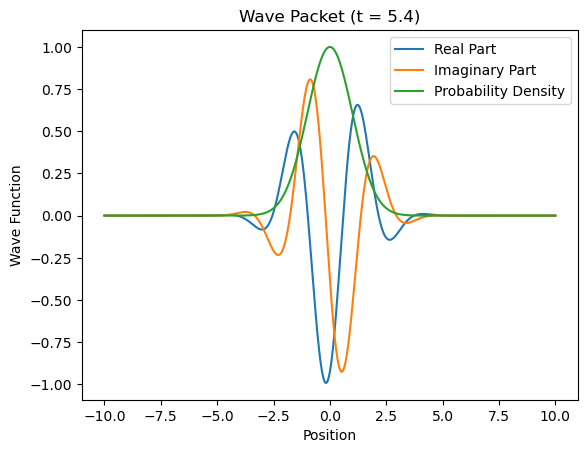

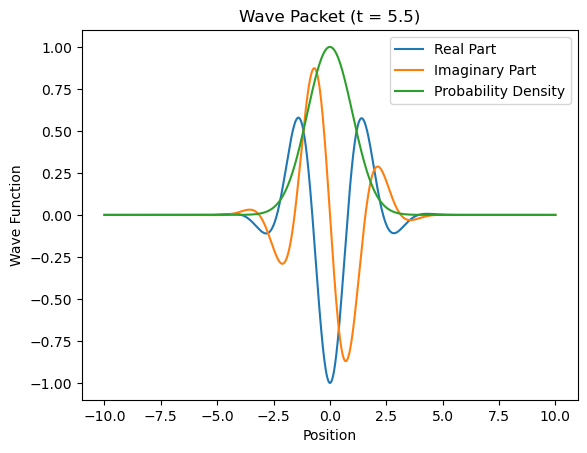

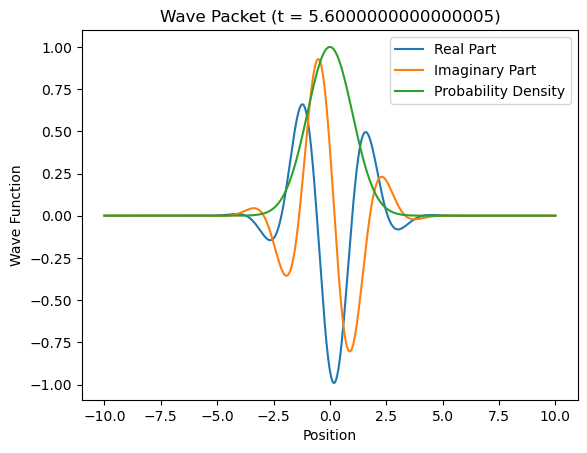

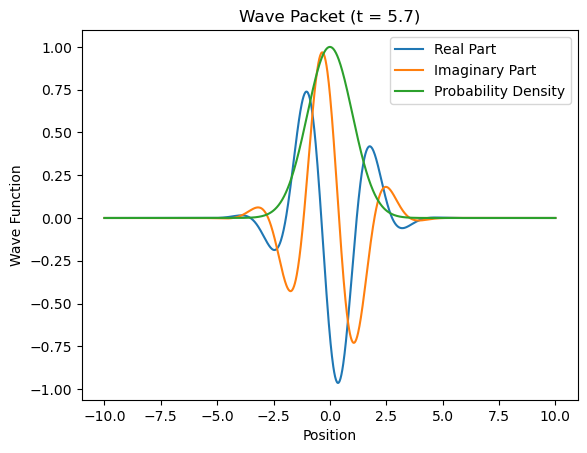

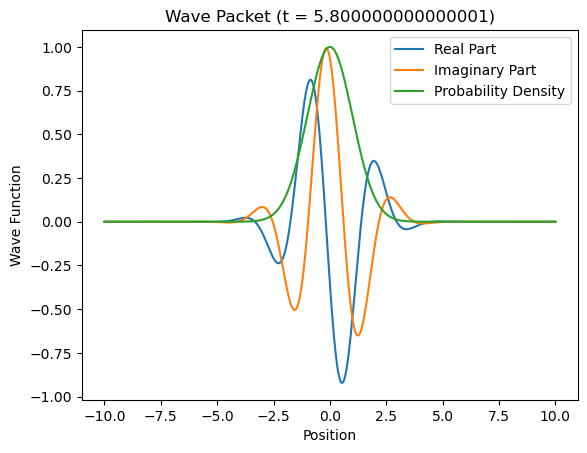

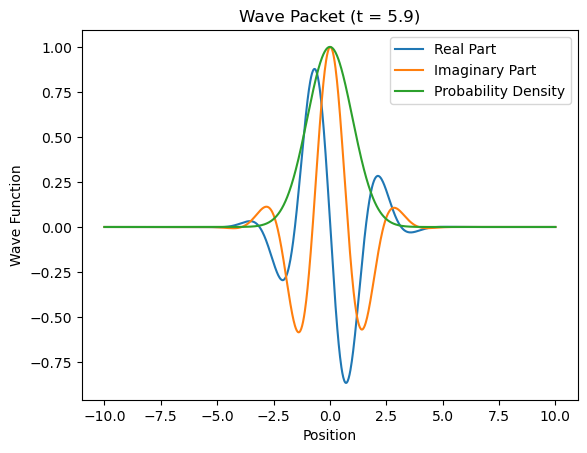

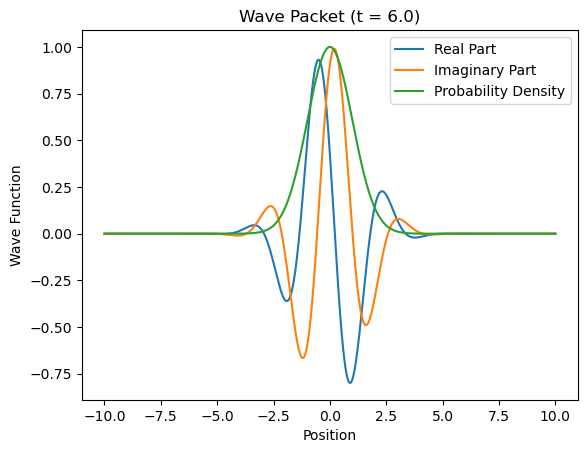

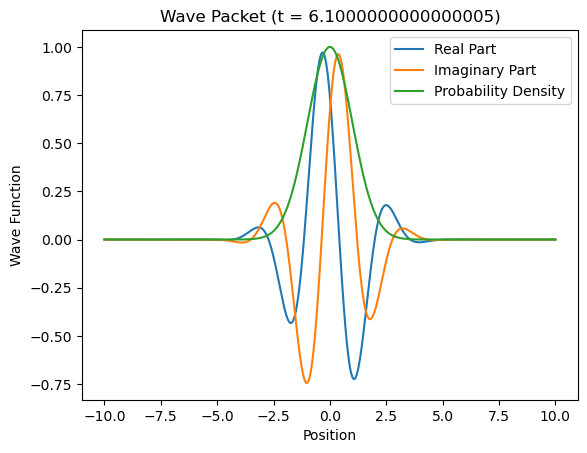

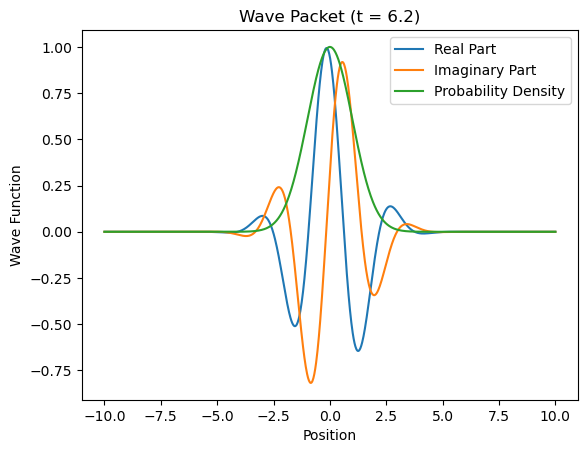

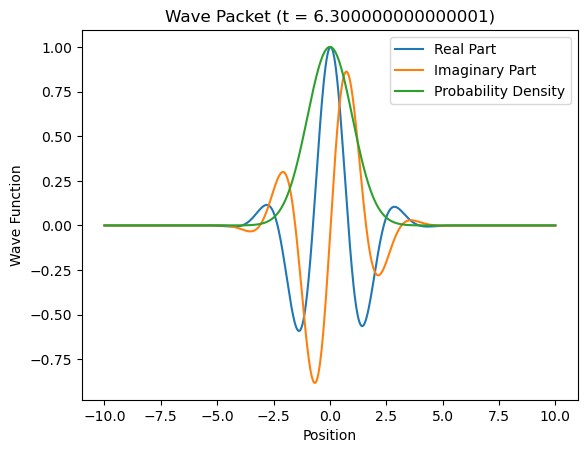

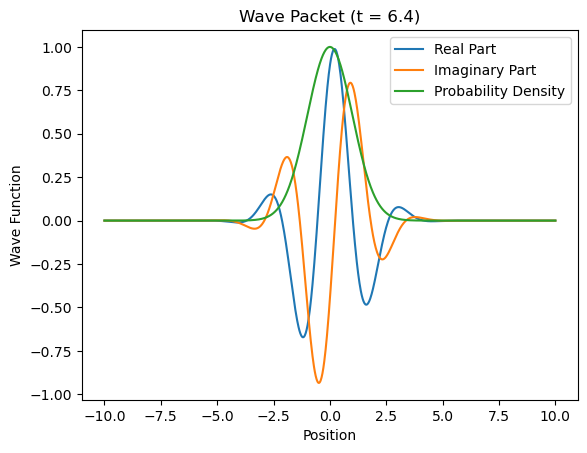

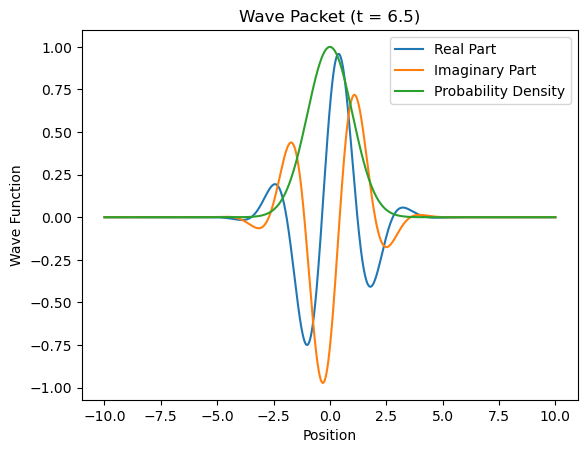

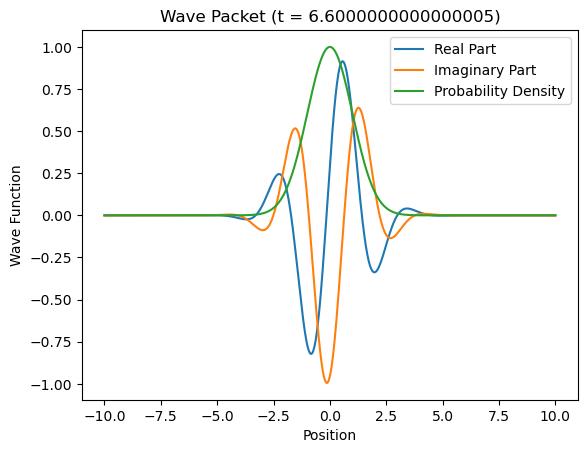

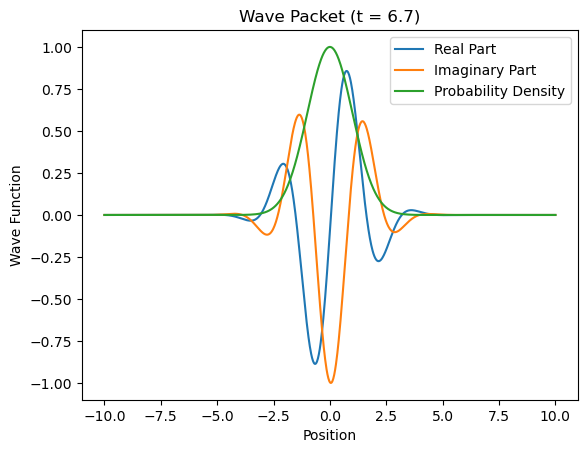

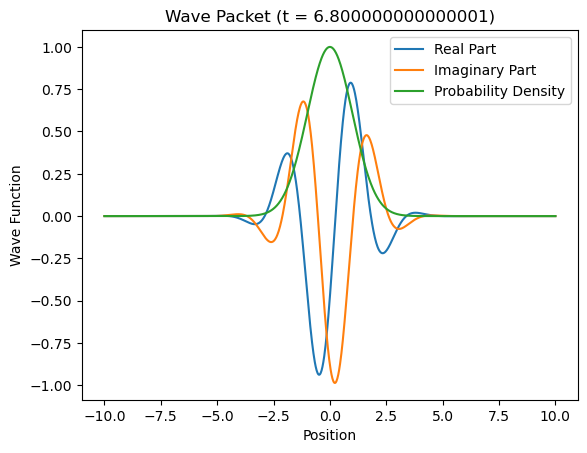

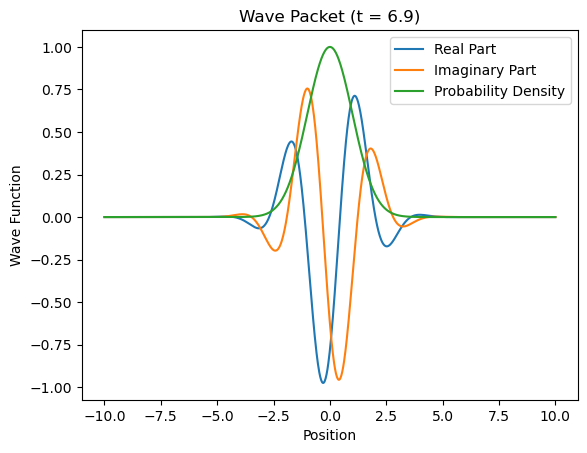

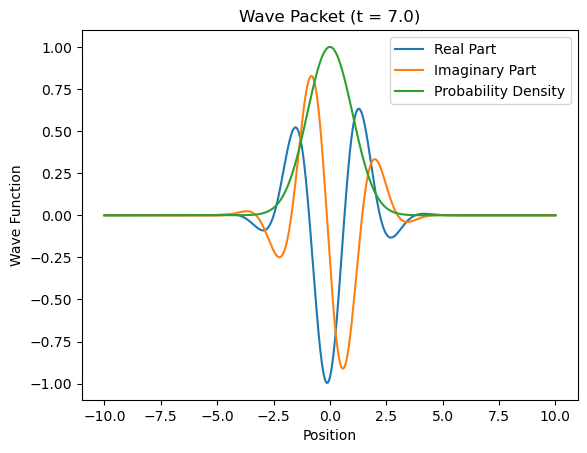

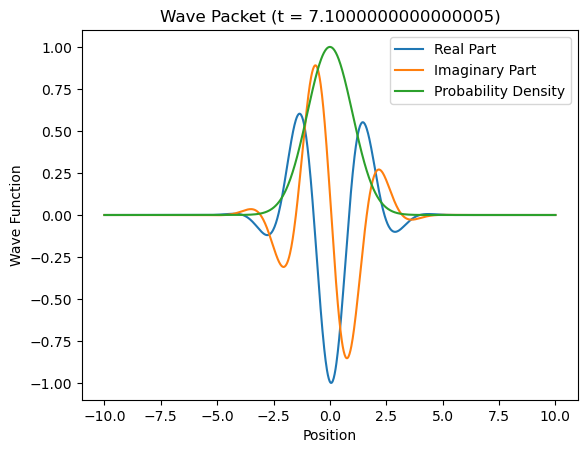

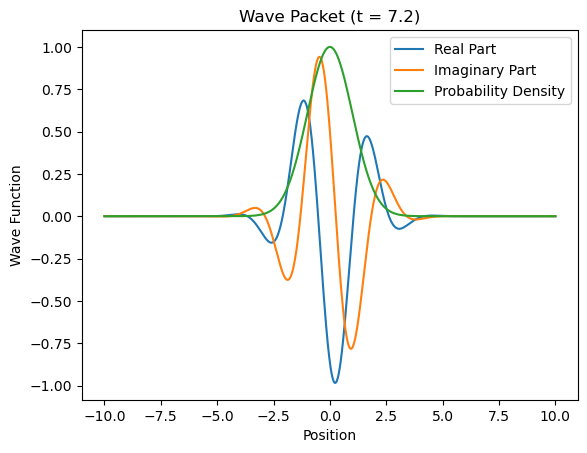

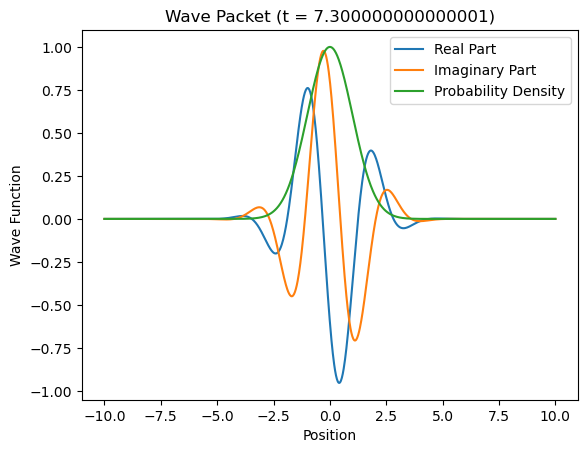

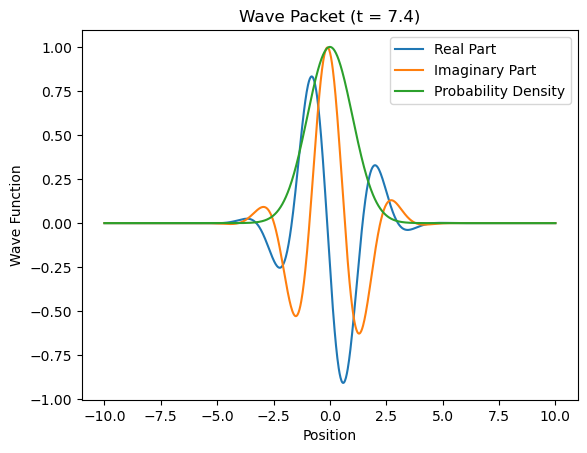

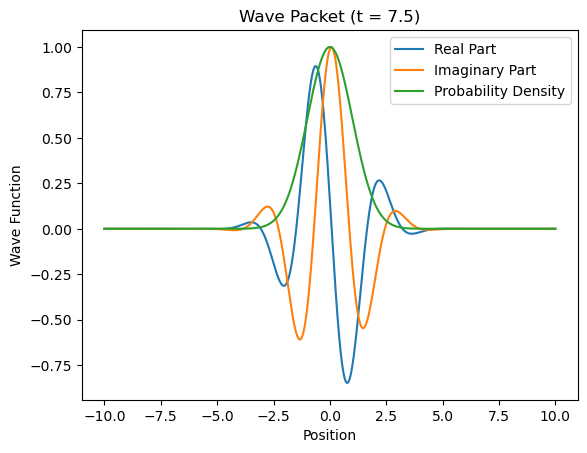

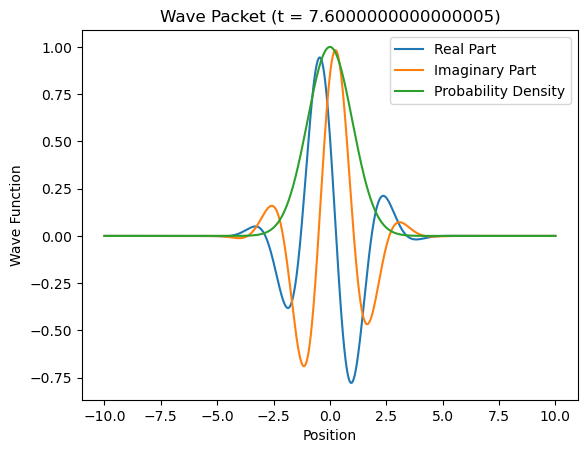

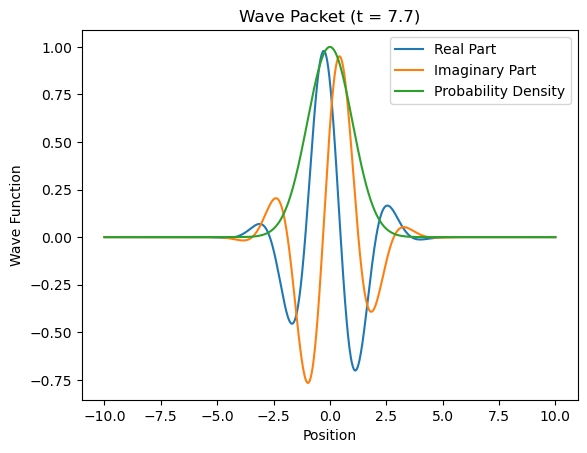

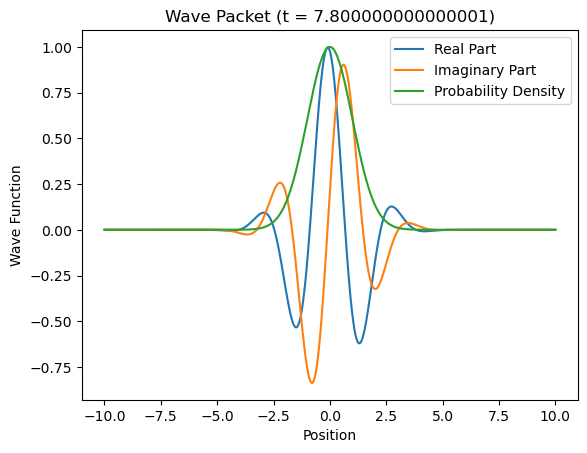

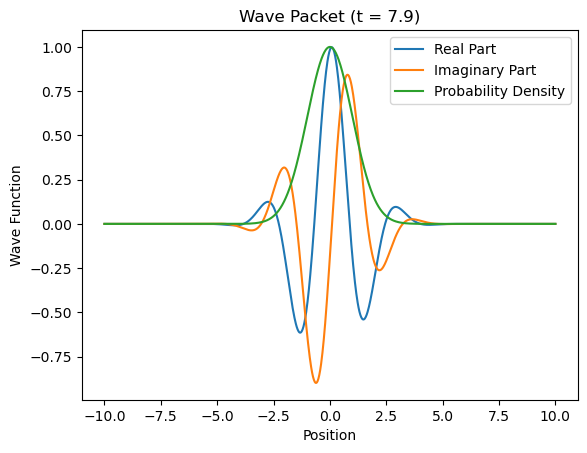

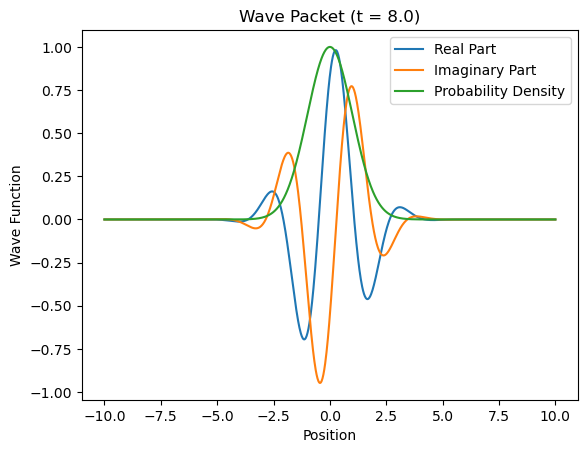

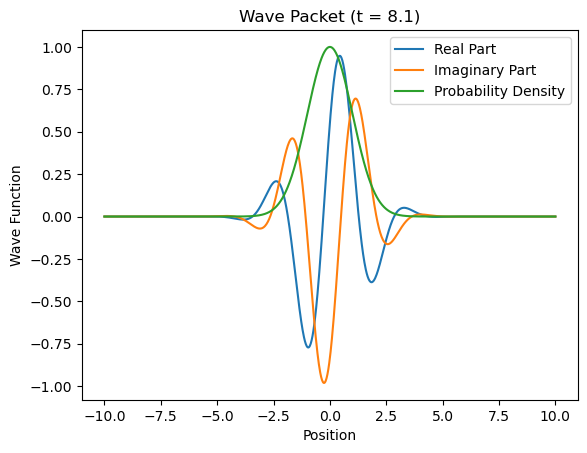

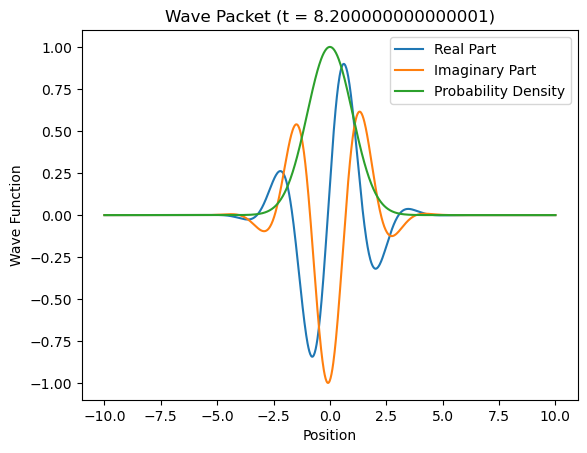

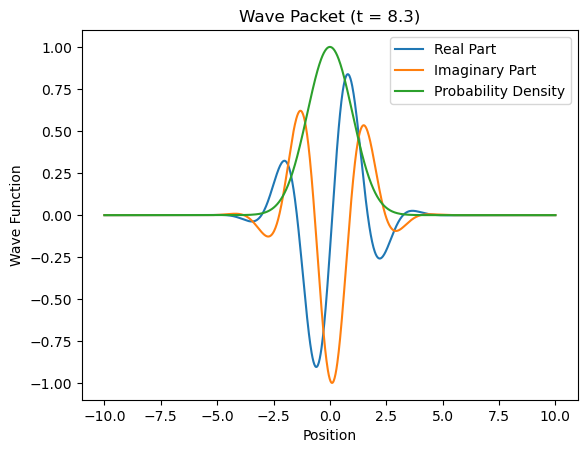

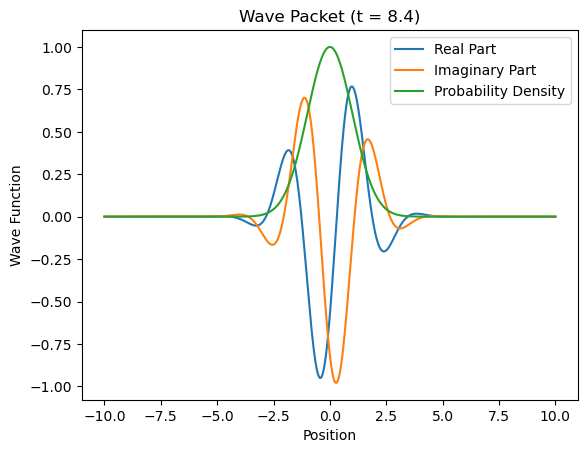

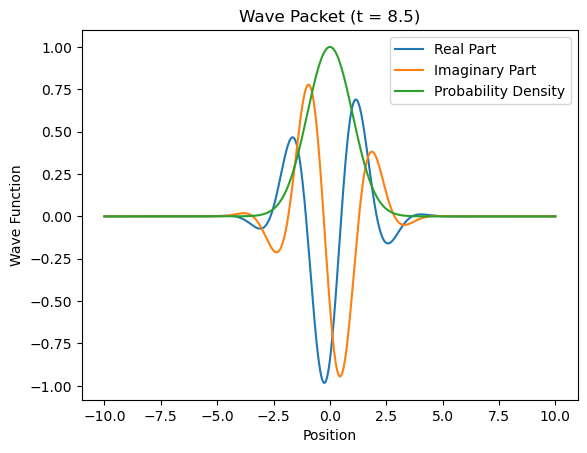

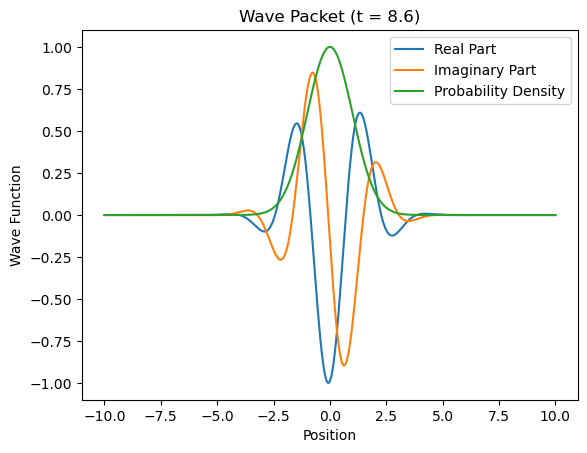

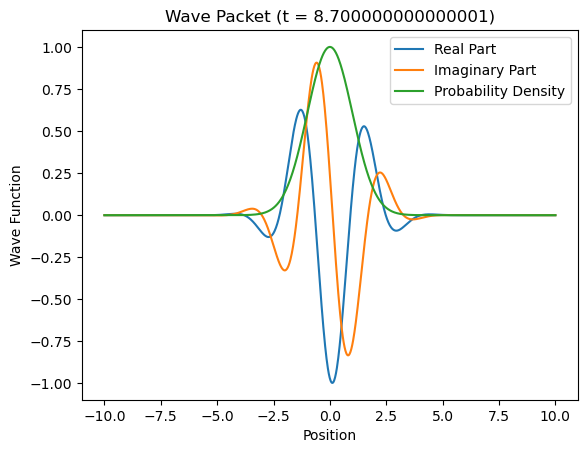

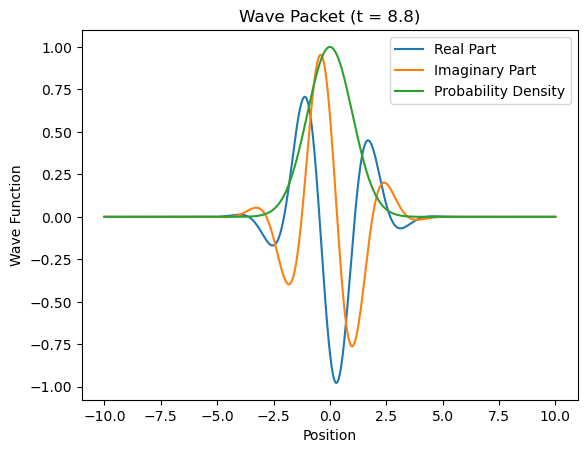

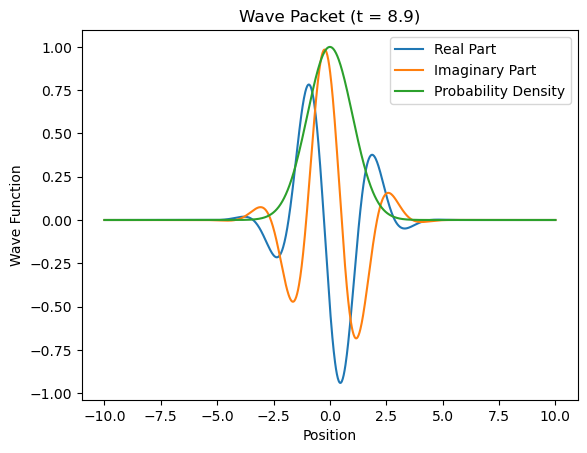

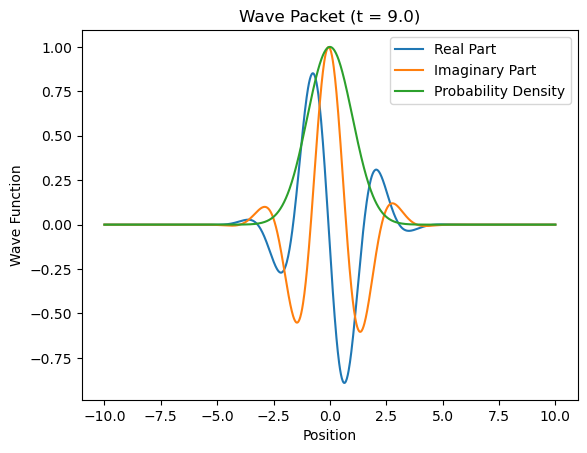

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
x_min = -10.0  # Minimum position
x_max = 10.0   # Maximum position
n_points = 1000  # Number of points on the grid

# Create the grid
x = np.linspace(x_min, x_max, n_points)

# Gaussian wave packet parameters
A = 1.0  # Amplitude
x0 = 0.0  # Central position
sigma = 1.0  # Width parameter
k0 = 2.0  # Central wave number
omega0 = k0**2  # Central angular frequency

# Create the Gaussian wave packet
psi = A * np.exp(-(x - x0)**2 / (4 * sigma**2)) * np.exp(1j * (k0 * x - omega0 * 0.0))

# Plot the initial wave packet
plt.figure()
plt.title("Wave Packet")
plt.plot(x, np.real(psi), label="Real Part")
plt.plot(x, np.imag(psi), label="Imaginary Part")
plt.plot(x, np.abs(psi)**2, label="Probability Density")
plt.xlabel("Position")
plt.ylabel("Wave Function")
plt.legend()
plt.show()

# Time evolution
t_max = 10.0  # Maximum time
n_steps = 100  # Number of time steps
dt = t_max / n_steps  # Time step size

# Perform time evolution
for i in range(n_steps):
    t = (i + 1) * dt
    psi = A * np.exp(-(x - x0)**2 / (4 * sigma**2)) * np.exp(1j * (k0 * x - omega0 * t))
    
    # Plot the updated wave packet
    plt.figure()
    plt.title(f"Wave Packet (t = {t})")
    plt.plot(x, np.real(psi), label="Real Part")
    plt.plot(x, np.imag(psi), label="Imaginary Part")
    plt.plot(x, np.abs(psi)**2, label="Probability Density")
    plt.xlabel("Position")
    plt.ylabel("Wave Function")
    plt.legend()
    plt.show()


# Superposition Principle: The principle that states that quantum systems can exist in a linear combination of multiple states.

The Superposition Principle is a fundamental concept in quantum mechanics that describes the behavior of quantum systems. It states that a quantum system can exist in a linear combination, or superposition, of multiple states simultaneously. This principle allows for the unique behavior and phenomena observed in the quantum realm.

Mathematically, the Superposition Principle can be expressed as follows:

ψ = c₁ψ₁ + c₂ψ₂ + c₃ψ₃ + ... + cₙψₙ

In this equation, ψ represents the state of the quantum system, and ψ₁, ψ₂, ψ₃, ..., ψₙ represent the individual states that the system can be in. The coefficients c₁, c₂, c₃, ..., cₙ are complex numbers that determine the probability amplitudes associated with each state. These coefficients must satisfy the normalization condition:

|c₁|² + |c₂|² + |c₃|² + ... + |cₙ|² = 1

This condition ensures that the total probability of finding the system in any state is equal to 1.

The Superposition Principle allows quantum systems to exhibit interference phenomena. When two or more states interfere constructively, their probability amplitudes add up, leading to an increased likelihood of observing the system in certain states. Conversely, destructive interference can lead to the cancellation of probability amplitudes, resulting in a decreased likelihood of finding the system in certain states.

One of the most famous examples of superposition is the double-slit experiment. In this experiment, particles, such as electrons or photons, are fired at a barrier with two slits. The particles can behave as both particles and waves, and when they pass through the slits, they form an interference pattern on a screen behind the barrier. This pattern can only be explained by considering the particles to be in a superposition of states, simultaneously passing through both slits and interfering with themselves.

The Superposition Principle also forms the basis for quantum computing. Quantum computers utilize the ability of quantum bits, or qubits, to exist in a superposition of states to perform computations in parallel. This parallelism can potentially provide significant computational advantages over classical computers for certain problems.

Overall, the Superposition Principle is a fundamental concept in quantum mechanics that allows quantum systems to exist in multiple states simultaneously, leading to the unique and often counterintuitive behavior observed in the quantum realm.

In [1]:
from qiskit import QuantumCircuit, Aer, execute

# Create a quantum circuit with 2 qubits
circuit = QuantumCircuit(2)

# Apply superposition to the first qubit
circuit.h(0)

# Apply a rotation to the second qubit
circuit.rx(0.5, 1)

# Measure the qubits
circuit.measure_all()

# Choose a backend
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit and obtain the results
job = execute(circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts(circuit)

print(counts)


{'00': 441, '01': 493, '11': 34, '10': 32}


# Quantum Harmonic Oscillator: Solving the Schrödinger equation for the quantum harmonic oscillator potential.

The quantum harmonic oscillator is a fundamental model in quantum mechanics that describes the behavior of a particle in a harmonic potential. It is widely studied due to its analytical solvability and its relevance to various physical systems, such as vibrating molecules and quantum field theories. The Schrödinger equation for the quantum harmonic oscillator potential can be solved using specific techniques. Here's an overview of the equations and the solution procedure:

The Schrödinger equation for a one-dimensional quantum harmonic oscillator is given by:

HΨ(x) = EΨ(x)

where H is the Hamiltonian operator, Ψ(x) is the wave function of the system, E is the energy of the system, and x represents the position of the particle.

The Hamiltonian operator for the quantum harmonic oscillator is:

H = (1/2m)p² + (1/2)mω²x²

where m is the mass of the particle, p is the momentum operator (p = -iħ(d/dx)), ω is the angular frequency of the oscillator, and x is the position operator.

To solve the Schrödinger equation, we introduce the ladder operators, a⁺ and a⁻, defined as:

a⁺ = (1/√(2mωħ))(mωx - ip)
a⁻ = (1/√(2mωħ))(mωx + ip)

These operators allow us to define the number operator, N, and the energy operator, E, as:

N = a⁺a⁻
E = (N + 1/2)ħω

Using these ladder operators, we can rewrite the Hamiltonian operator as:

H = ħω(N + 1/2)

Substituting this into the Schrödinger equation, we obtain:

(ħω(N + 1/2))Ψ(x) = EΨ(x)

Next, we express the wave function Ψ(x) as a linear combination of eigenstates of the number operator N:

Ψ(x) = ∑ cₙΨₙ(x)

where Ψₙ(x) represents the nth eigenstate of the number operator and cₙ are complex coefficients.

By applying the number operator to the wave function, we find:

NΨₙ(x) = nΨₙ(x)

where n is a non-negative integer representing the eigenvalue of the number operator.

Substituting these expressions back into the Schrödinger equation, we obtain a recurrence relation:

(ħω(n + 1/2))cₙ + ħω√(n + 1)cₙ₊₁ + ħω√(n)cₙ₋₁ = Ecₙ

This relation allows us to calculate the energy eigenvalues, E, and the corresponding coefficients, cₙ, for each eigenstate of the harmonic oscillator.

The energy eigenvalues for the quantum harmonic oscillator are given by:

Eₙ = (n + 1/2)ħω

where n = 0, 1, 2, ...

The corresponding eigenstates, Ψₙ(x), can be expressed in terms of the Hermite polynomials, Hₙ(x), as:

Ψₙ(x) = (1/√(2ⁿn!))(mω/πħ)^(1/4) e^(-mωx²/2ħ) Hₙ(√(mω/ħ)x)

These eigenstates form an orthonormal set, satisfying the normalization condition:

∫ Ψₙ(x)Ψₘ(x

) dx = δₙₘ

where δₙₘ is the Kronecker delta.

In summary, the quantum harmonic oscillator can be solved by expressing the wave function as a linear combination of eigenstates of the number operator. The energy eigenvalues and eigenstates can be obtained by solving the recurrence relation and expressing them in terms of Hermite polynomials.

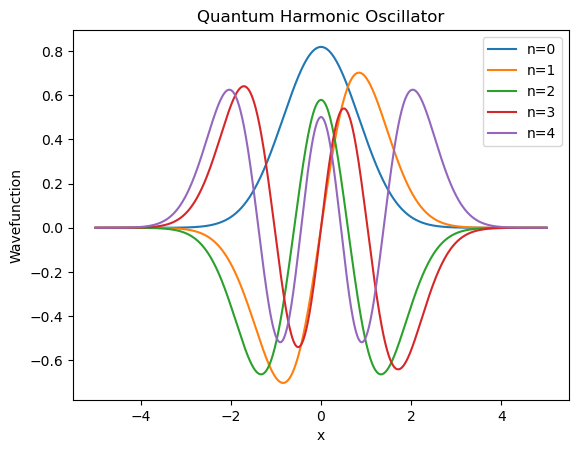

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1  # Reduced Planck's constant
m = 1     # Mass of the particle
omega = 1 # Angular frequency of the oscillator

# Discretization parameters
L = 5           # Spatial range (-L to L)
N = 1000        # Number of grid points
dx = 2 * L / N  # Grid spacing

# Create the grid
x = np.linspace(-L, L, N)

# Construct the Hamiltonian matrix
diag = hbar**2 / (2 * m * dx**2) + 0.5 * m * omega**2 * x**2
off_diag = -hbar**2 / (4 * m * dx**2)
H = np.diag(diag) + np.diag(off_diag * np.ones(N-1), k=1) + np.diag(off_diag * np.ones(N-1), k=-1)

# Diagonalize the Hamiltonian
energies, wavefunctions = np.linalg.eigh(H)

# Plot the energy levels and wavefunctions
for i in range(5):  # Plot first 5 energy levels
    plt.plot(x, wavefunctions[:, i] / np.sqrt(dx), label=f"n={i}")
plt.xlabel('x')
plt.ylabel('Wavefunction')
plt.title('Quantum Harmonic Oscillator')
plt.legend()
plt.show()


# Potential Well: Analyzing the behavior of particles in potential wells, including finite and infinite potential wells

A potential well refers to a region in space where a particle is confined due to a potential energy barrier. There are two commonly studied types of potential wells: the finite potential well and the infinite potential well. Let's explore the behavior of particles in each of these potential wells along with the relevant equations.

1. Finite Potential Well:
   In a finite potential well, the particle is confined within a region where the potential energy is finite, while the potential energy outside the well is higher. The Schrödinger equation is used to analyze the behavior of particles in this potential well.

   The one-dimensional time-independent Schrödinger equation for a particle of mass m in a finite potential well is given by:

   -ħ²/(2m) ∂²Ψ(x)/∂x² + V(x)Ψ(x) = EΨ(x)

   where ħ is the reduced Planck's constant, Ψ(x) is the wave function, V(x) is the potential energy function, E is the total energy of the particle, and x is the position of the particle.

   The potential energy function V(x) takes different forms depending on the specific potential well being considered. Solving the Schrödinger equation within the well region, subject to appropriate boundary conditions, allows us to determine the energy eigenvalues (quantized energy levels) and corresponding eigenstates (wave functions) of the particle.

2. Infinite Potential Well:
   In an infinite potential well, the particle is confined within a region where the potential energy is infinite, while the potential energy outside the well is infinitely high. This is an idealized model that is often used to study quantum confinement effects.

   The one-dimensional infinite potential well is defined by the following potential energy function:

   V(x) = 0    if 0 < x < a
   V(x) = ∞    otherwise

   The Schrödinger equation within the well region is:

   -ħ²/(2m) ∂²Ψ(x)/∂x² = EΨ(x)

   Solving this equation with appropriate boundary conditions, such as Ψ(0) = Ψ(a) = 0, leads to the quantized energy levels and wave functions of the particle within the infinite potential well.

   The energy eigenvalues (E) for the infinite potential well are given by:

   Eₙ = (n²π²ħ²)/(2ma²)

   where n is a positive integer (n = 1, 2, 3, ...) representing the quantum number associated with the energy level. The corresponding wave functions are standing waves characterized by sine or cosine functions.

   The spatial extent of the well is denoted by 'a', and the particle is confined within this region.

Analyzing the behavior of particles in potential wells involves solving the Schrödinger equation with appropriate potential energy functions and boundary conditions. The resulting solutions provide insights into the quantized energy levels and wave functions of the confined particles.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1  # Reduced Planck's constant
m = 1     # Mass of the particle

# Discretization parameters
L = 10           # Spatial range (-L to L)
N = 1000         # Number of grid points
dx = 2 * L / N   # Grid spacing

# Potential energy function for the finite well
def finite_potential(x):
    if abs(x) < 2:
        return -1
    else:
        return 0

# Potential energy function for the infinite well
def infinite_potential(x):
    if abs(x) < 1:
        return 0
    else:
        return np.inf

# Create the grid
x = np.linspace(-L, L, N)

# Construct the Hamiltonian matrix for the finite potential well
H_finite = np.diag((hbar**2 / (2 * m * dx**2)) + finite_potential(x))

# Diagonalize the Hamiltonian for the finite potential well
energies_finite, wavefunctions_finite = np.linalg.eigh(H_finite)

# Construct the Hamiltonian matrix for the infinite potential well
H_infinite = np.diag(hbar**2 / (2 * m * dx**2) * np.ones(N-1), k=1) + \
             np.diag(hbar**2 / (2 * m * dx**2) * np.ones(N-1), k=-1) + \
             np.diag((hbar**2 / (m * dx**2)) + infinite_potential(x))

# Diagonalize the Hamiltonian for the infinite potential well
energies_infinite, wavefunctions_infinite = np.linalg.eigh(H_infinite)

# Plotting
plt.figure(figsize=(10, 8))

# Plotting for finite potential well
plt.subplot(2, 1, 1)
for i in range(3):  # Plot first 3 energy levels
    plt.plot(x, wavefunctions_finite[:, i] / np.sqrt(dx), label=f"n={i+1}")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('Wavefunction')
plt.title('Finite Potential Well')
plt.legend()

# Plotting for infinite potential well
plt.subplot(2, 1, 2)
for i in range(3):  # Plot first 3 energy levels
    plt.plot(x, wavefunctions_infinite[:, i] / np.sqrt(dx), label=f"n={i+1}")
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('Wavefunction')
plt.title('Infinite Potential Well')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Scattering: Using the Schrödinger equation to study the scattering of particles by a potential barrier.

Scattering refers to the phenomenon of particles interacting with a potential barrier or scatterer and changing their trajectory or energy. The Schrödinger equation is a fundamental equation in quantum mechanics that describes the behavior of particles in terms of their wave functions. By solving the Schrödinger equation for a given potential, we can study the scattering process.

The time-independent Schrödinger equation for a particle of mass \(m\) in one dimension is:

\[-\frac{\hbar^2}{2m} \frac{{d^2\psi(x)}}{{dx^2}} + V(x)\psi(x) = E\psi(x)\]

where \(\psi(x)\) is the wave function of the particle, \(V(x)\) is the potential energy function, \(E\) is the total energy of the particle, and \(\hbar\) is the reduced Planck's constant.

To study scattering, we typically consider a potential barrier that can be represented by a step function. The potential energy function \(V(x)\) is given by:

\[V(x) = \begin{cases} V_0, & \text{for } x < 0 \\ 0, & \text{for } x \geq 0 \end{cases}\]

where \(V_0\) represents the height of the potential barrier.

The scattering problem can be solved by dividing the system into three regions: the incident region (\(x < 0\)), the barrier region (\(0 \leq x \leq a\)), and the transmitted region (\(x > a\)). The wave function in each region can be expressed as a combination of incoming and outgoing waves.

1. Incident Region:
In the incident region (\(x < 0\)), the wave function can be written as:

\[\psi(x) = e^{ikx} + R e^{-ikx}\]

where \(k\) represents the wave number of the incident particle and \(R\) is the reflection coefficient.

2. Barrier Region:
In the barrier region (\(0 \leq x \leq a\)), the wave function can be expressed as:

\[\psi(x) = A e^{iqx} + B e^{-iqx}\]

where \(q\) represents the wave number inside the barrier and \(A\) and \(B\) are the coefficients of the transmitted and reflected waves, respectively.

3. Transmitted Region:
In the transmitted region (\(x > a\)), the wave function can be written as:

\[\psi(x) = T e^{ikx}\]

where \(T\) is the transmission coefficient.

By applying boundary conditions at the interfaces between the regions, we can derive equations to determine the reflection and transmission coefficients. The continuity of the wave function and its derivative at \(x = 0\) and \(x = a\) leads to a set of equations that can be solved to obtain the coefficients.

The reflection coefficient (\(R\)) and transmission coefficient (\(T\)) are related as follows:

\[R = \left|\frac{{B}}{{A}}\right|^2 \quad \text{and} \quad T = \frac{{4k^2q^2}}{{(k^2 + q^2)^2}}\]

The probability of reflection (\(P_{\text{refl}}\)) and transmission (\(P_{\text{trans}}\)) can be calculated as:

\[P_{\text{refl}} = |R|^2 \quad \text{and} \quad P_{\text{trans}} = |T|^2\]

These equations provide a framework for studying scattering using the Schrödinger equation and analyzing the behavior of particles interacting

 with a potential barrier.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0    # Reduced Planck's constant
m = 1.0       # Particle mass
V0 = 10.0     # Barrier height
E = 20.0      # Total energy

# Define the potential energy function
def potential(x):
    if x < 0:
        return V0
    else:
        return 0

# Solve the scattering problem
def solve_scattering():
    # Set up the grid
    xmin, xmax = -10, 10
    nx = 1000
    dx = (xmax - xmin) / (nx - 1)
    x = np.linspace(xmin, xmax, nx)

    # Initialize the wave function
    psi = np.zeros(nx, dtype=complex)
    psi[0] = 1.0

    # Numerical integration using finite differences
    for i in range(1, nx):
        psi[i] = psi[i-1] + (2 * m / hbar**2) * dx**2 * (potential(x[i]) - E) * psi[i-1]

    # Calculate reflection and transmission coefficients
    A = 1.0
    B = psi[-1]
    R = abs(B / A)**2
    T = 4 * (np.real(A)**2) / (np.real(A)**2 + np.real(B)**2)**2

    return R, T

# Run the scattering simulation
reflection, transmission = solve_scattering()

# Print the results
print("Reflection coefficient:", reflection)
print("Transmission coefficient:", transmission)


Reflection coefficient: 3.108859554443792e-11
Transmission coefficient: 3.9999999997512905


# Perturbation Theory: An approximation technique to solve the Schrödinger equation for weakly perturbed systems.

Perturbation theory is a powerful technique used to approximate solutions to the Schrödinger equation for quantum systems that are subject to weak perturbations. It allows us to compute corrections to the energy eigenvalues and wave functions by treating the perturbation as a small deviation from the unperturbed system. Here's an overview of perturbation theory, including the equations involved:

Consider the time-independent Schrödinger equation for a system without perturbations:

\[H_0 \psi_n^{(0)} = E_n^{(0)} \psi_n^{(0)}\]

where \(H_0\) is the unperturbed Hamiltonian, \(\psi_n^{(0)}\) is the unperturbed wave function, and \(E_n^{(0)}\) is the unperturbed energy eigenvalue.

Now, let's introduce a perturbation to the Hamiltonian:

\[H = H_0 + \lambda V\]

where \(V\) is the perturbation potential, and \(\lambda\) is a parameter that controls the strength of the perturbation.

The goal is to find corrections to the energy eigenvalues and wave functions, denoted as \(E_n\) and \(\psi_n\), respectively, up to a desired order in \(\lambda\).

Perturbation theory is typically developed in terms of the first-order correction (\(E_n^{(1)}\) and \(\psi_n^{(1)}\)) and higher-order corrections (\(E_n^{(2)}\), \(E_n^{(3)}\), etc.) to the energy eigenvalues and wave functions.

1. First-order Correction:
The first-order correction to the energy eigenvalue is given by:

\[E_n^{(1)} = \langle \psi_n^{(0)} | V | \psi_n^{(0)} \rangle\]

The first-order correction to the wave function is:

\[\psi_n^{(1)} = \sum_{m \neq n} \frac{\langle \psi_m^{(0)} | V | \psi_n^{(0)} \rangle}{E_n^{(0)} - E_m^{(0)}} \psi_m^{(0)}\]

2. Higher-order Corrections:
The higher-order corrections to the energy eigenvalue can be obtained recursively using Rayleigh-Schrödinger perturbation theory:

\[E_n^{(k)} = \sum_{m \neq n} \frac{\langle \psi_m^{(0)} | V | \psi_n^{(k-1)} \rangle}{E_n^{(0)} - E_m^{(0)}}\]

The higher-order corrections to the wave function can also be computed recursively:

\[\psi_n^{(k)} = \sum_{m \neq n} \frac{\langle \psi_m^{(0)} | V | \psi_n^{(k-1)} \rangle}{E_n^{(0)} - E_m^{(0)}} \psi_m^{(k-1)}\]

The perturbation theory can be terminated at any desired order, depending on the accuracy needed for the problem at hand.

It's important to note that these equations assume non-degenerate perturbation theory, where the unperturbed energy levels are non-degenerate (non-degenerate perturbation theory). If degeneracies are present, degenerate perturbation theory techniques need to be employed, such as the use of secular equations and diagonalization procedures.

Perturbation theory is a powerful tool for solving quantum systems with weak perturbations, enabling the computation of accurate energy corrections and wave functions beyond the unperturbed solutions.

In [5]:
import numpy as np

# Define the unperturbed Hamiltonian matrix
H0 = np.array([[1, 0], [0, -1]])

# Define the perturbation potential matrix
V = np.array([[0, 1], [1, 0]])

# Compute the first-order correction to the energy eigenvalue
def compute_first_order_correction(E0, psi0):
    psi0_conj = np.conjugate(psi0)
    return np.dot(psi0_conj, np.dot(V, psi0))

# Compute the unperturbed energy eigenvalues and eigenvectors
E0, psi0 = np.linalg.eigh(H0)

# Compute the first-order correction to the energy eigenvalues
E1 = np.zeros_like(E0)
for i in range(len(E0)):
    E1[i] = E0[i] + compute_first_order_correction(E0[i], psi0[:, i])

# Print the results
print("Unperturbed Energy Eigenvalues:", E0)
print("First-Order Corrected Energy Eigenvalues:", E1)


Unperturbed Energy Eigenvalues: [-1.  1.]
First-Order Corrected Energy Eigenvalues: [-1.  1.]


# Time-Dependent Perturbation Theory: Extending perturbation theory to time-dependent Hamiltonians.

Time-Dependent Perturbation Theory (TDPT) is an extension of perturbation theory that allows us to study the time evolution of quantum systems under time-dependent perturbations. TDPT provides a framework to calculate time-dependent corrections to the wave function and observables in terms of the perturbation strength and time.

Consider the time-dependent Schrödinger equation:

\[i\hbar \frac{\partial}{\partial t} \psi(t) = (H_0 + \lambda V(t)) \psi(t)\]

where \(H_0\) is the unperturbed Hamiltonian, \(V(t)\) is the time-dependent perturbation potential, \(\psi(t)\) is the time-dependent wave function, and \(\lambda\) is a parameter that controls the strength of the perturbation.

The goal is to find a solution to the time-dependent Schrödinger equation in the form of a power series expansion, where the wave function is expanded in terms of increasing orders of \(\lambda\):

\[\psi(t) = \psi^{(0)}(t) + \lambda \psi^{(1)}(t) + \lambda^2 \psi^{(2)}(t) + \ldots\]

1. Zeroth-Order Solution:
The zeroth-order solution corresponds to the unperturbed system and is given by:

\[i\hbar \frac{\partial}{\partial t} \psi^{(0)}(t) = H_0 \psi^{(0)}(t)\]

2. First-Order Correction:
The first-order correction to the wave function is obtained by substituting the zeroth-order solution into the time-dependent Schrödinger equation and solving for \(\psi^{(1)}(t)\):

\[i\hbar \frac{\partial}{\partial t} \psi^{(1)}(t) = (H_0 - E^{(0)}) \psi^{(1)}(t) - V(t) \psi^{(0)}(t)\]

where \(E^{(0)}\) is the unperturbed energy eigenvalue.

3. Higher-Order Corrections:
The higher-order corrections can be obtained recursively by substituting the previous order solutions into the time-dependent Schrödinger equation. The \(k\)-th order correction to the wave function is given by:

\[i\hbar \frac{\partial}{\partial t} \psi^{(k)}(t) = (H_0 - E^{(0)}) \psi^{(k)}(t) - V(t) \psi^{(k-1)}(t)\]

The time evolution of observables can also be calculated using TDPT. For an observable \(A\), the first-order correction is given by:

\[A^{(1)}(t) = \langle \psi^{(0)}(t) | A | \psi^{(1)}(t) \rangle\]

Higher-order corrections to observables can be calculated similarly.

It's important to note that the application of TDPT assumes that the perturbation potential varies slowly with time compared to the characteristic time scale of the system. Furthermore, TDPT is typically used for weak perturbations and short-time dynamics.

The power series expansion can be truncated at a desired order depending on the accuracy required for the problem. TDPT provides a systematic approach to study time-dependent perturbations and can be a valuable tool for analyzing and predicting the time evolution of quantum systems.

In [6]:
import numpy as np

# Define the unperturbed Hamiltonian matrix
H0 = np.array([[1, 0], [0, -1]])

# Define the time-dependent perturbation potential matrix
def V(t):
    return np.array([[0, np.exp(-1j*t)], [np.exp(1j*t), 0]])

# Compute the zeroth-order solution (unperturbed wave function)
def compute_zeroth_order_solution(psi0, t):
    return np.dot(np.exp(-1j * H0 * t / hbar), psi0)

# Compute the first-order correction to the wave function
def compute_first_order_correction(psi0, t):
    zeroth_order_solution = compute_zeroth_order_solution(psi0, t)
    return -1j / hbar * np.dot(V(t), zeroth_order_solution)

# Set up initial conditions
hbar = 1  # Planck's constant divided by 2*pi
psi0 = np.array([1, 0])  # Initial wave function

# Define time points
t_points = np.linspace(0, 2*np.pi, 100)

# Compute the time-dependent wave function
psi = np.zeros((len(t_points), len(psi0)), dtype=np.complex128)
for i, t in enumerate(t_points):
    psi[i] = compute_zeroth_order_solution(psi0, t) + compute_first_order_correction(psi0, t)

# Print the results
for i, t in enumerate(t_points):
    print(f"Time: {t:.2f} | Psi(t): {psi[i]}")


Time: 0.00 | Psi(t): [1.-1.j 1.-1.j]
Time: 0.06 | Psi(t): [0.93456276-1.0614106j 1.        -1.j       ]
Time: 0.13 | Psi(t): [0.86536236-1.11854727j 1.        -1.j        ]
Time: 0.19 | Psi(t): [0.79267745-1.17117994j 1.        -1.j        ]
Time: 0.25 | Psi(t): [0.71680071-1.21909669j 1.        -1.j        ]
Time: 0.32 | Psi(t): [0.63803767-1.26210456j 1.        -1.j        ]
Time: 0.38 | Psi(t): [0.55670548-1.30003039j 1.        -1.j        ]
Time: 0.44 | Psi(t): [0.47313163-1.33272145j 1.        -1.j        ]
Time: 0.51 | Psi(t): [0.38765264-1.36004611j 1.        -1.j        ]
Time: 0.57 | Psi(t): [0.30061272-1.38189435j 1.        -1.j        ]
Time: 0.63 | Psi(t): [0.21236233-1.39817819j 1.        -1.j        ]
Time: 0.70 | Psi(t): [0.12325683-1.40883205j 1.        -1.j        ]
Time: 0.76 | Psi(t): [0.03365503-1.41381305j 1.        -1.j        ]
Time: 0.83 | Psi(t): [-0.0560823-1.41310112j  1.       -1.j        ]
Time: 0.89 | Psi(t): [-0.1455938-1.40669913j  1.       -1.j        ]

# Angular Momentum: Incorporating angular momentum operators into the Schrödinger equation for systems with rotational symmetry

Angular momentum is a fundamental property in quantum mechanics that describes the rotational motion of particles. In systems with rotational symmetry, the Schrödinger equation can be modified to include angular momentum operators. Let's explore the concept of angular momentum and its incorporation into the Schrödinger equation.

1. Angular Momentum Operators:
In quantum mechanics, angular momentum is represented by three operators: the orbital angular momentum operator \(\mathbf{L}\), the spin angular momentum operator \(\mathbf{S}\), and the total angular momentum operator \(\mathbf{J}\). These operators satisfy the commutation relations:

\[[L_i, L_j] = i\hbar \epsilon_{ijk} L_k\]
\[[S_i, S_j] = i\hbar \epsilon_{ijk} S_k\]
\[[J_i, J_j] = i\hbar \epsilon_{ijk} J_k\]

where \(i, j, k\) represent Cartesian coordinates, \(\hbar\) is the reduced Planck's constant, and \(\epsilon_{ijk}\) is the Levi-Civita symbol.

2. Angular Momentum Eigenstates:
The eigenstates of the angular momentum operators are characterized by the eigenvalues of the corresponding operators. The eigenstates of the orbital angular momentum operator \(\mathbf{L}\) are denoted as \(\lvert l, m_l \rangle\), where \(l\) represents the orbital angular momentum quantum number and \(m_l\) represents the magnetic quantum number. Similarly, the eigenstates of the spin angular momentum operator \(\mathbf{S}\) are denoted as \(\lvert s, m_s \rangle\), where \(s\) represents the spin angular momentum quantum number and \(m_s\) represents the magnetic quantum number.

3. Angular Momentum Addition:
The total angular momentum operator \(\mathbf{J}\) is the sum of the orbital and spin angular momentum operators:

\[\mathbf{J} = \mathbf{L} + \mathbf{S}\]

The eigenstates of the total angular momentum operator \(\mathbf{J}\) are given by the tensor product of the eigenstates of the orbital and spin angular momentum operators:

\(\lvert j, m_j \rangle = \lvert l, m_l \rangle \otimes \lvert s, m_s \rangle\)

where \(j\) represents the total angular momentum quantum number and \(m_j\) represents the magnetic quantum number.

4. Schrödinger Equation with Angular Momentum:
In systems with rotational symmetry, the Schrödinger equation can be modified to include the angular momentum operators. The modified Schrödinger equation is:

\[\left( -\frac{\hbar^2}{2m} \nabla^2 + V(r) \right) \Psi(r, \theta, \phi) = E \Psi(r, \theta, \phi)\]

where \(\nabla^2\) is the Laplacian operator, \(V(r)\) is the potential energy, \(\Psi(r, \theta, \phi)\) is the wave function depending on the radial coordinate \(r\) and the angular coordinates \(\theta\) and \(\phi\), and \(E\) is the energy eigenvalue.

The wave function can be separated into a radial part and an angular part:

\[\Psi(r, \theta, \phi) = R(r) \cdot Y(\theta, \phi)\]

The radial part \(R(r)\) satisfies the radial part of the Schrödinger equation, while the angular part \(Y(\theta, \phi)\) satisfies the angular part of the Sch

rödinger equation with angular momentum operators:

\[\left( \frac{1}{\sin\theta} \frac{\partial}{\partial \theta} \left( \sin\theta \frac{\partial}{\partial \theta} \right) + \frac{1}{\sin^2\theta} \frac{\partial^2}{\partial \phi^2} + \frac{2m}{\hbar^2} \left( E - V(r) - \frac{\hbar^2}{2m} \frac{l(l+1)}{r^2} \right) \right) Y(\theta, \phi) = 0\]

where \(l\) is the orbital angular momentum quantum number.

The angular part \(Y(\theta, \phi)\) can be further expanded using spherical harmonics \(Y_{lm}(\theta, \phi)\):

\[Y(\theta, \phi) = \sum_{m_l=-l}^{l} C_{lm_l} Y_{lm_l}(\theta, \phi)\]

where \(C_{lm_l}\) are the expansion coefficients and \(m_l\) takes values from \(-l\) to \(l\) (including both).

By solving the angular part of the Schrödinger equation, one can determine the allowed values of the orbital angular momentum quantum number \(l\) and the magnetic quantum number \(m_l\) for a given system with rotational symmetry.

Note that the specific form of the Schrödinger equation and the solutions can vary depending on the potential energy \(V(r)\) and the specific system being considered. The equations provided here represent the general framework for incorporating angular momentum into the Schrödinger equation in systems with rotational symmetry.

In [7]:
import numpy as np
from scipy.special import sph_harm
from scipy.linalg import eigh

# Define the maximum angular momentum quantum number
l_max = 2

# Define the angles (theta, phi) for evaluation
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 200)

# Create a meshgrid of angles
theta_mesh, phi_mesh = np.meshgrid(theta, phi, indexing='ij')

# Compute the spherical harmonics for all quantum numbers up to l_max
spherical_harmonics = []
for l in range(l_max+1):
    for m in range(-l, l+1):
        Y_lm = sph_harm(m, l, phi_mesh, theta_mesh)
        spherical_harmonics.append(Y_lm)

# Concatenate the spherical harmonics along the last axis
spherical_harmonics = np.stack(spherical_harmonics, axis=-1)

# Print the spherical harmonics for l=0 and m=0
print("Spherical Harmonics (l=0, m=0):")
print(spherical_harmonics[..., 0])  # Access the specific harmonic using indexing

# Define the angular momentum operator matrix
angular_momentum_operator = np.diag(np.arange(-l_max, l_max+1))

# Diagonalize the angular momentum operator matrix
eigenvalues, eigenvectors = eigh(angular_momentum_operator)

# Print the eigenvalues and eigenvectors of the angular momentum operator
print("Eigenvalues of Angular Momentum Operator:")
print(eigenvalues)

print("Eigenvectors of Angular Momentum Operator:")
print(eigenvectors)


Spherical Harmonics (l=0, m=0):
[[0.28209479+0.j 0.28209479+0.j 0.28209479+0.j ... 0.28209479+0.j
  0.28209479+0.j 0.28209479+0.j]
 [0.28209479+0.j 0.28209479+0.j 0.28209479+0.j ... 0.28209479+0.j
  0.28209479+0.j 0.28209479+0.j]
 [0.28209479+0.j 0.28209479+0.j 0.28209479+0.j ... 0.28209479+0.j
  0.28209479+0.j 0.28209479+0.j]
 ...
 [0.28209479+0.j 0.28209479+0.j 0.28209479+0.j ... 0.28209479+0.j
  0.28209479+0.j 0.28209479+0.j]
 [0.28209479+0.j 0.28209479+0.j 0.28209479+0.j ... 0.28209479+0.j
  0.28209479+0.j 0.28209479+0.j]
 [0.28209479+0.j 0.28209479+0.j 0.28209479+0.j ... 0.28209479+0.j
  0.28209479+0.j 0.28209479+0.j]]
Eigenvalues of Angular Momentum Operator:
[-2. -1.  0.  1.  2.]
Eigenvectors of Angular Momentum Operator:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


# Spin: Introducing the concept of spin and its inclusion in the Schrödinger equation.

Spin is an intrinsic property of elementary particles in quantum mechanics. It is a quantum mechanical angular momentum that does not have a classical counterpart. The concept of spin is incorporated into the Schrödinger equation through the addition of spin operators and spin eigenstates. Let's explore spin and its inclusion in the Schrödinger equation.

1. Spin Operators:
In quantum mechanics, spin is described by spin operators. The spin operators are denoted as \(\mathbf{S}\) and satisfy the commutation relations:

\([S_i, S_j] = i\hbar \epsilon_{ijk} S_k\)

where \(i, j, k\) represent Cartesian coordinates, \(\hbar\) is the reduced Planck's constant, and \(\epsilon_{ijk}\) is the Levi-Civita symbol.

2. Spin Eigenstates:
The spin operators have associated eigenstates, which are referred to as spin eigenstates. The spin eigenstates are denoted as \(\lvert s, m_s \rangle\), where \(s\) represents the spin quantum number and \(m_s\) represents the magnetic quantum number. The spin quantum number can be either a half-integer or an integer.

3. Addition of Spin:
The total spin operator \(\mathbf{S}\) is obtained by summing the spin operators of individual particles. If we have a system of two particles, the total spin operator is given by:

\(\mathbf{S} = \mathbf{S}_1 + \mathbf{S}_2\)

The eigenstates of the total spin operator are expressed as the tensor product of the spin eigenstates of the individual particles:

\(\lvert s, m_s \rangle = \lvert s_1, m_{s_1} \rangle \otimes \lvert s_2, m_{s_2} \rangle\)

where \(s_1\), \(m_{s_1}\) are the spin quantum number and magnetic quantum number of the first particle, and \(s_2\), \(m_{s_2}\) are the spin quantum number and magnetic quantum number of the second particle.

4. Schrödinger Equation with Spin:
The Schrödinger equation for particles with spin incorporates the spin operators. The modified Schrödinger equation is:

\(i\hbar \frac{\partial}{\partial t} \Psi(\mathbf{r}, t) = \left( -\frac{\hbar^2}{2m} \nabla^2 + V(\mathbf{r}) + \mathbf{S} \cdot \mathbf{B} \right) \Psi(\mathbf{r}, t)\)

where \(\Psi(\mathbf{r}, t)\) is the wave function depending on the position vector \(\mathbf{r}\) and time \(t\), \(m\) is the particle mass, \(V(\mathbf{r})\) is the potential energy, \(\mathbf{S}\) is the spin operator, and \(\mathbf{B}\) is the magnetic field vector.

The inclusion of the spin operator in the Schrödinger equation allows for the description of systems with spin degrees of freedom, such as electrons.

Please note that the specific form of the Schrödinger equation with spin depends on the system and the interactions involved. The equations provided here represent the general framework for incorporating spin into the Schrödinger equation and do not include all possible terms or interactions. The Schrödinger equation for specific systems and interactions must be derived accordingly.

In [8]:
import numpy as np

# Define spin operators (Pauli matrices)
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Define spin eigenstates
spin_up = np.array([[1], [0]], dtype=complex)
spin_down = np.array([[0], [1]], dtype=complex)

# Define Schrödinger equation with spin
def schrodinger_equation_with_spin(psi, H, t):
    hbar = 1.0  # Reduced Planck's constant (modify as needed)
    i = complex(0, 1)  # Imaginary unit

    # Calculate time derivative of psi
    d_psi_dt = (-i/hbar) * np.dot(H, psi)

    return d_psi_dt

# Example usage
# Define a Hamiltonian matrix with spin interaction
H = np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]], dtype=complex)

# Initial wave function
psi_initial = np.kron(spin_up, spin_down)  # Example initial spin state

# Time points for evaluation
t_points = np.linspace(0, 1, 100)

# Solve the Schrödinger equation for each time point
psi_final = []
for t in t_points:
    psi = psi_initial
    d_psi_dt = schrodinger_equation_with_spin(psi, H, t)
    psi_final.append(psi + d_psi_dt)

# Print the final wave function at the last time point
print("Final wave function at t = 1:")
print(psi_final[-1])


Final wave function at t = 1:
[[0.+0.j]
 [1.+1.j]
 [0.+0.j]
 [0.+0.j]]
